# Part II - (A RESEARCH/ANALYSIS ON LOAN DATA RECORDS FROM PROSPER LOAN COMPANY)
## by (Ebenezer Mayowa, PEACE)

## Dataset and Investigation Overview


>This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
The analysis in this worksheet/notebook would be structured to enable us provide univariate, bivariate and multivariate relationships, this research would provide answers to questions like how many homeowners borrow in a state, which year has the highest rate of borrowing homeowners, which state has the highest amount of borrowing homeowners, is there a correlation between your available bank credit and your borrowing capacity, identifying the frequency of the categorical variables; Term of loan, Borrower's employment status, year of loan, and loan status, are there differences between loans depending on the loan term?. The data set consist of 113,937 rows and 81 columns, implying 113,937 recorded observations with 81 features. The main features of interest to this study include but not limited to the following; loan status, loan term, employment Status, is borrower a homeowner or not, borrower state, income verifiable or not and occupation. To get a better understanding of how this features of interest would be investigated a number of features would support this study which include the following features original loan amount, loan origination date, monthly loan payment, loan current days of delinquency, stated monthly income, investors and recommendations. In total 11 features were pulled together and form into a new dataframe to be reference for exploration and analysis. To analyse the loan with respect the year, the loan origination date column was converted from object datatype to datetime, afterwards the year was extracted from the datetime before setting the data type of the extracted year column as categorical variable, also the loan term values was trasform from the original values 12months, 36months, and 60months to short term, medium term and long term respectively to make for a better behavior as a categorical variable. The loan status has values respresenting past due in a number of categories of days, these values were replaced with a single value named 'past due' regardless of the number of days. The borrower state values were transformed from state abbrevation to full text without leaving out the stated monthy income and monthy loan payment variable out from transformation, these variables were converted from float to integer for consistency with the loan amount data type. The occupation column was transformed from object data type to categorical data type 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.color_palette("colorblind")
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
new_df = pd.read_csv('new_df.csv')
new_df.head()

LoanOriginationDate         Term  Year LoanStatus BorrowerState  \
0          2007-09-12  Medium Term  2007  Completed      COLORADO   
1          2014-03-03  Medium Term  2014    Current      COLORADO   
2          2007-01-17  Medium Term  2007  Completed       GEORGIA   
3          2012-11-01  Medium Term  2012    Current       GEORGIA   
4          2013-09-20  Medium Term  2013    Current     MINNESOTA   

      Occupation EmploymentStatus  IsBorrowerHomeowner  \
0          Other    Self-employed                 True   
1   Professional         Employed                False   
2          Other    Not available                False   
3  Skilled Labor         Employed                 True   
4      Executive         Employed                 True   

   LoanCurrentDaysDelinquent  IncomeVerifiable  StatedMonthlyIncome  \
0                          0              True                 3083   
1                          0              True                 6125   
2                          0              True                 2083   
3                          0              True                 2875   
4                          0              True                 9583   

   LoanOriginalAmount  MonthlyLoanPayment  Recommendations  Investors  \
0                9425                 330                0        258   
1               10000                 318                0          1   
2                3001                 123                0         41   
3               10000                 321                0        158   
4               15000                 563                0         20   

   AvailableBankcardCredit  
0                   1500.0  
1                  10266.0  
2                      NaN  
3                  30754.0  
4                    695.0

In [3]:
# convert object to categorical datatype
new_df.Term = new_df.Term.astype('category')
new_df.Year = new_df.Year.astype('category')
new_df.LoanStatus = new_df.LoanStatus.astype('category')
new_df.BorrowerState = new_df.BorrowerState.astype('category')
new_df.Occupation = new_df.Occupation.astype('category')
new_df.EmploymentStatus = new_df.EmploymentStatus.astype('category')

## Histogram Distibution of Loan Original Amount

>The distribution of loan original amount is right-skewed, a case of symmetrical distribution. Most of the loan original amount are clustered on the left side of the histogram. The peak of the original loan amount occurs at about 5000 dollars, there exist outliers in the ranges between 32000 dollars and 35000 dollars, the data spread is from about 1000 dollars to 3500 dollars.

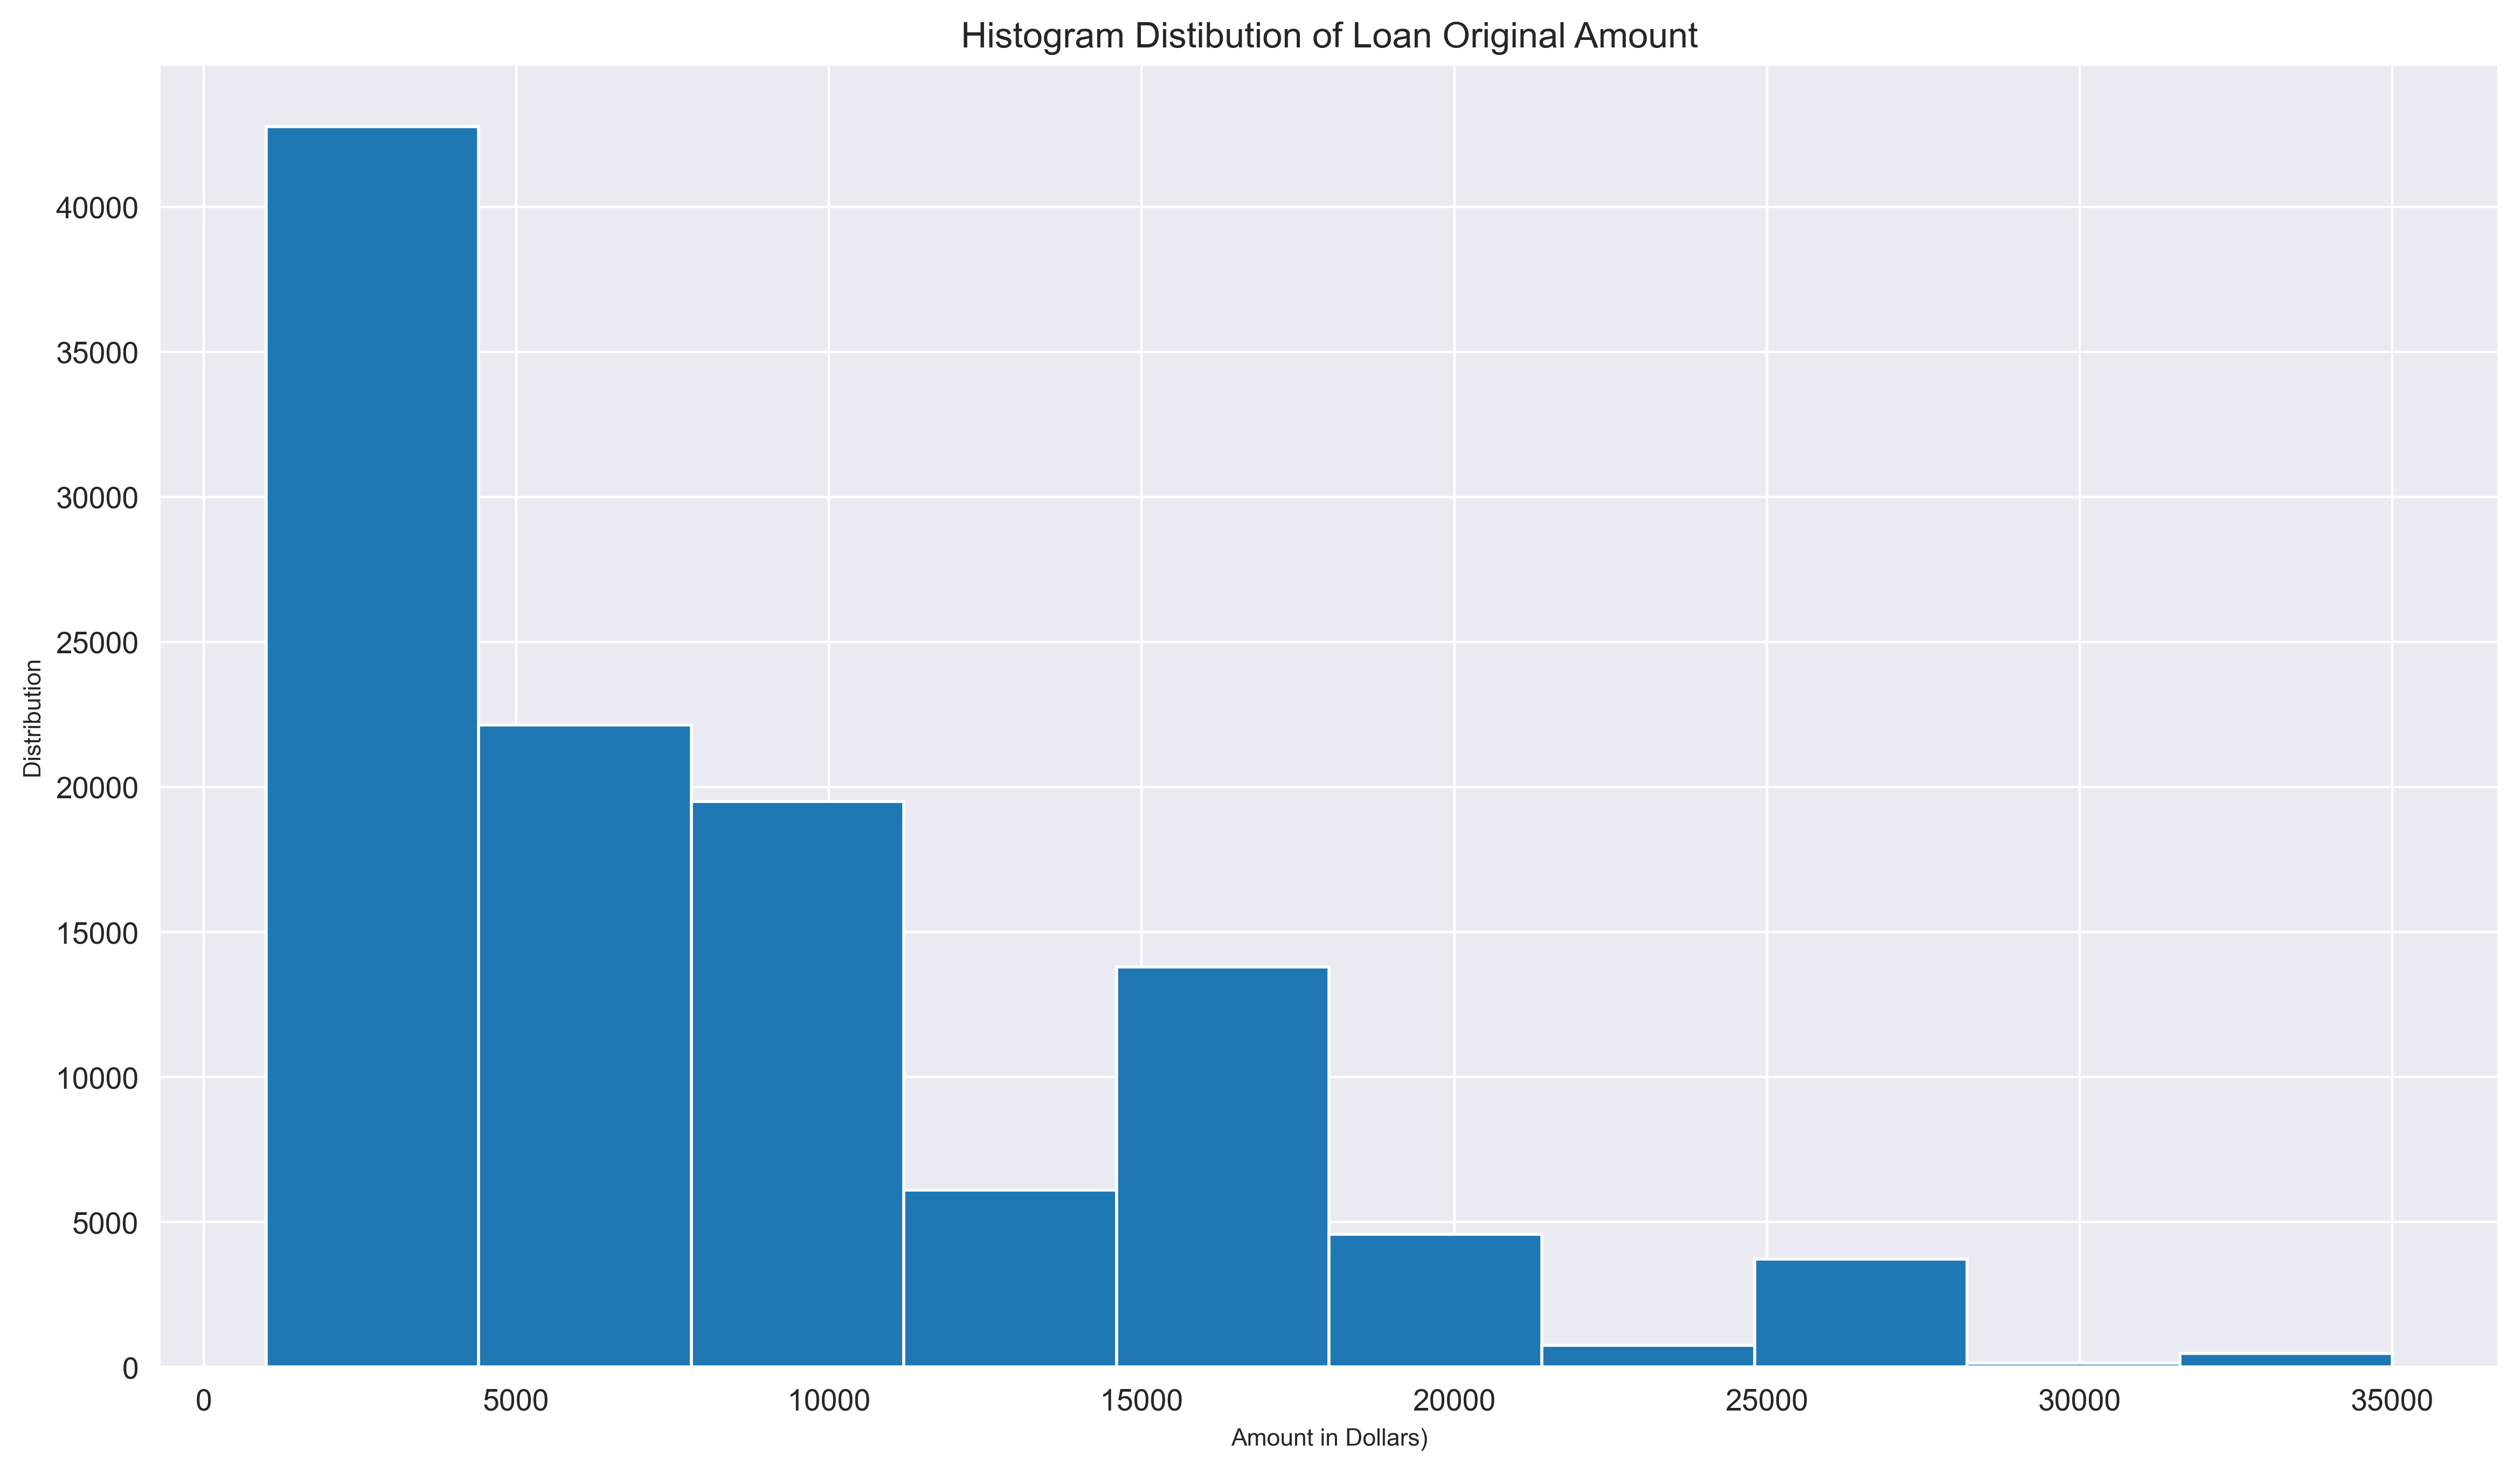

In [4]:
def chart(x, title):
    """plot histogram to show 
    dist of numeric variable"""
    """param: x, title"""
    """return none"""
    plt.figure(figsize=(14,8), dpi = 400)
    plt.hist(x = x)
    plt.title(title)
    plt.xlabel('Amount in Dollars)', fontsize = 8)
    plt.ylabel('Distribution', fontsize = 8)
chart(new_df.LoanOriginalAmount, 'Histogram Distibution of Loan Original Amount')

## Histogram Distibution of Monthly Loan Payment

> The monthly loan payment is also right-skewed, a case of symmetrical distribution. Most of the monthly loan payment are clustered on the left side of the histogram. The peak of the original loan amount occurs at about 173 dollars, the data spread is from about zero dollars to 2251 dollars.

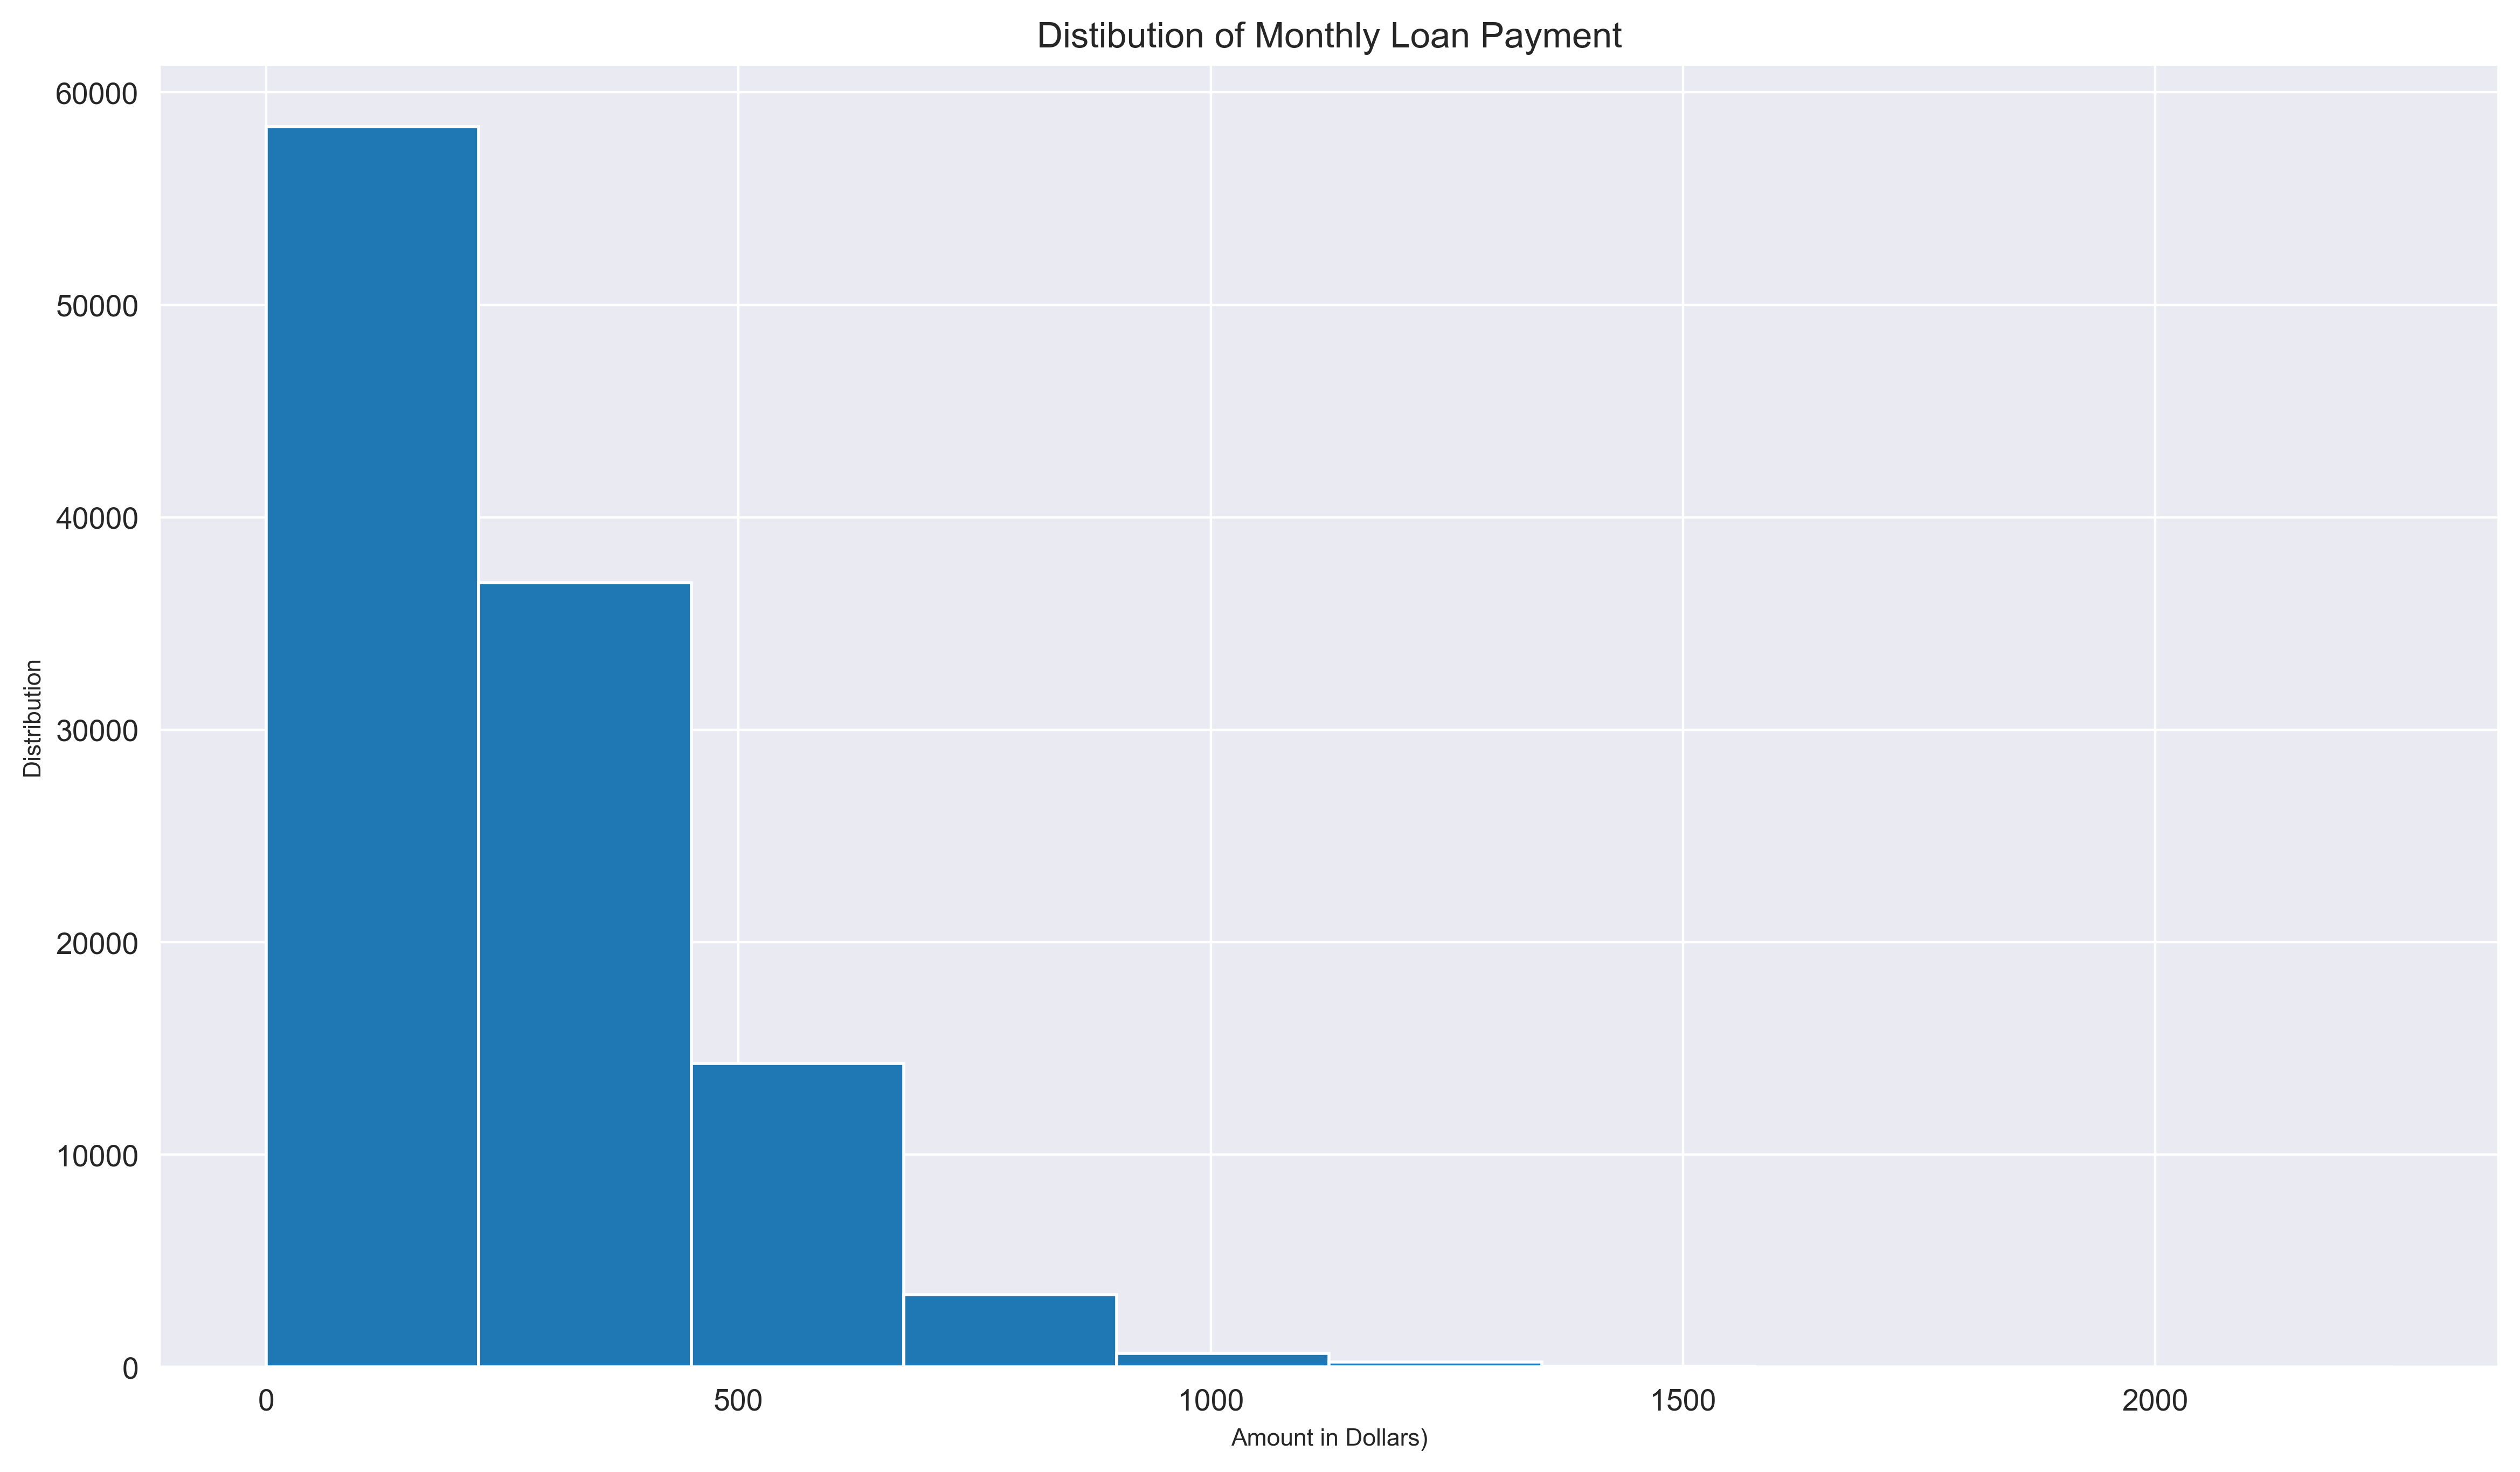

In [5]:
#Monthly loan payment graph
chart(new_df.MonthlyLoanPayment, 'Distibution of Monthly Loan Payment')

**DENSITY FUNCTION OF SOME DATA POINTS**

>The probability that a randomly chosen loan original amount will fall between 5000 dollars and 12000 dollars can be calculated as the area between the density function (graph) and the x-axis in the interval [5000, 12000].

In [6]:
def density(x, title):
    """plot a kernel density estimate"""
    """param: x, title"""
    """return none"""
    plt.figure(figsize=(14,8), dpi = 400)
    sns.kdeplot(x = x, data = new_df, fill = True)
    plt.xlabel('Amount(Dollars)')
    plt.title(title)

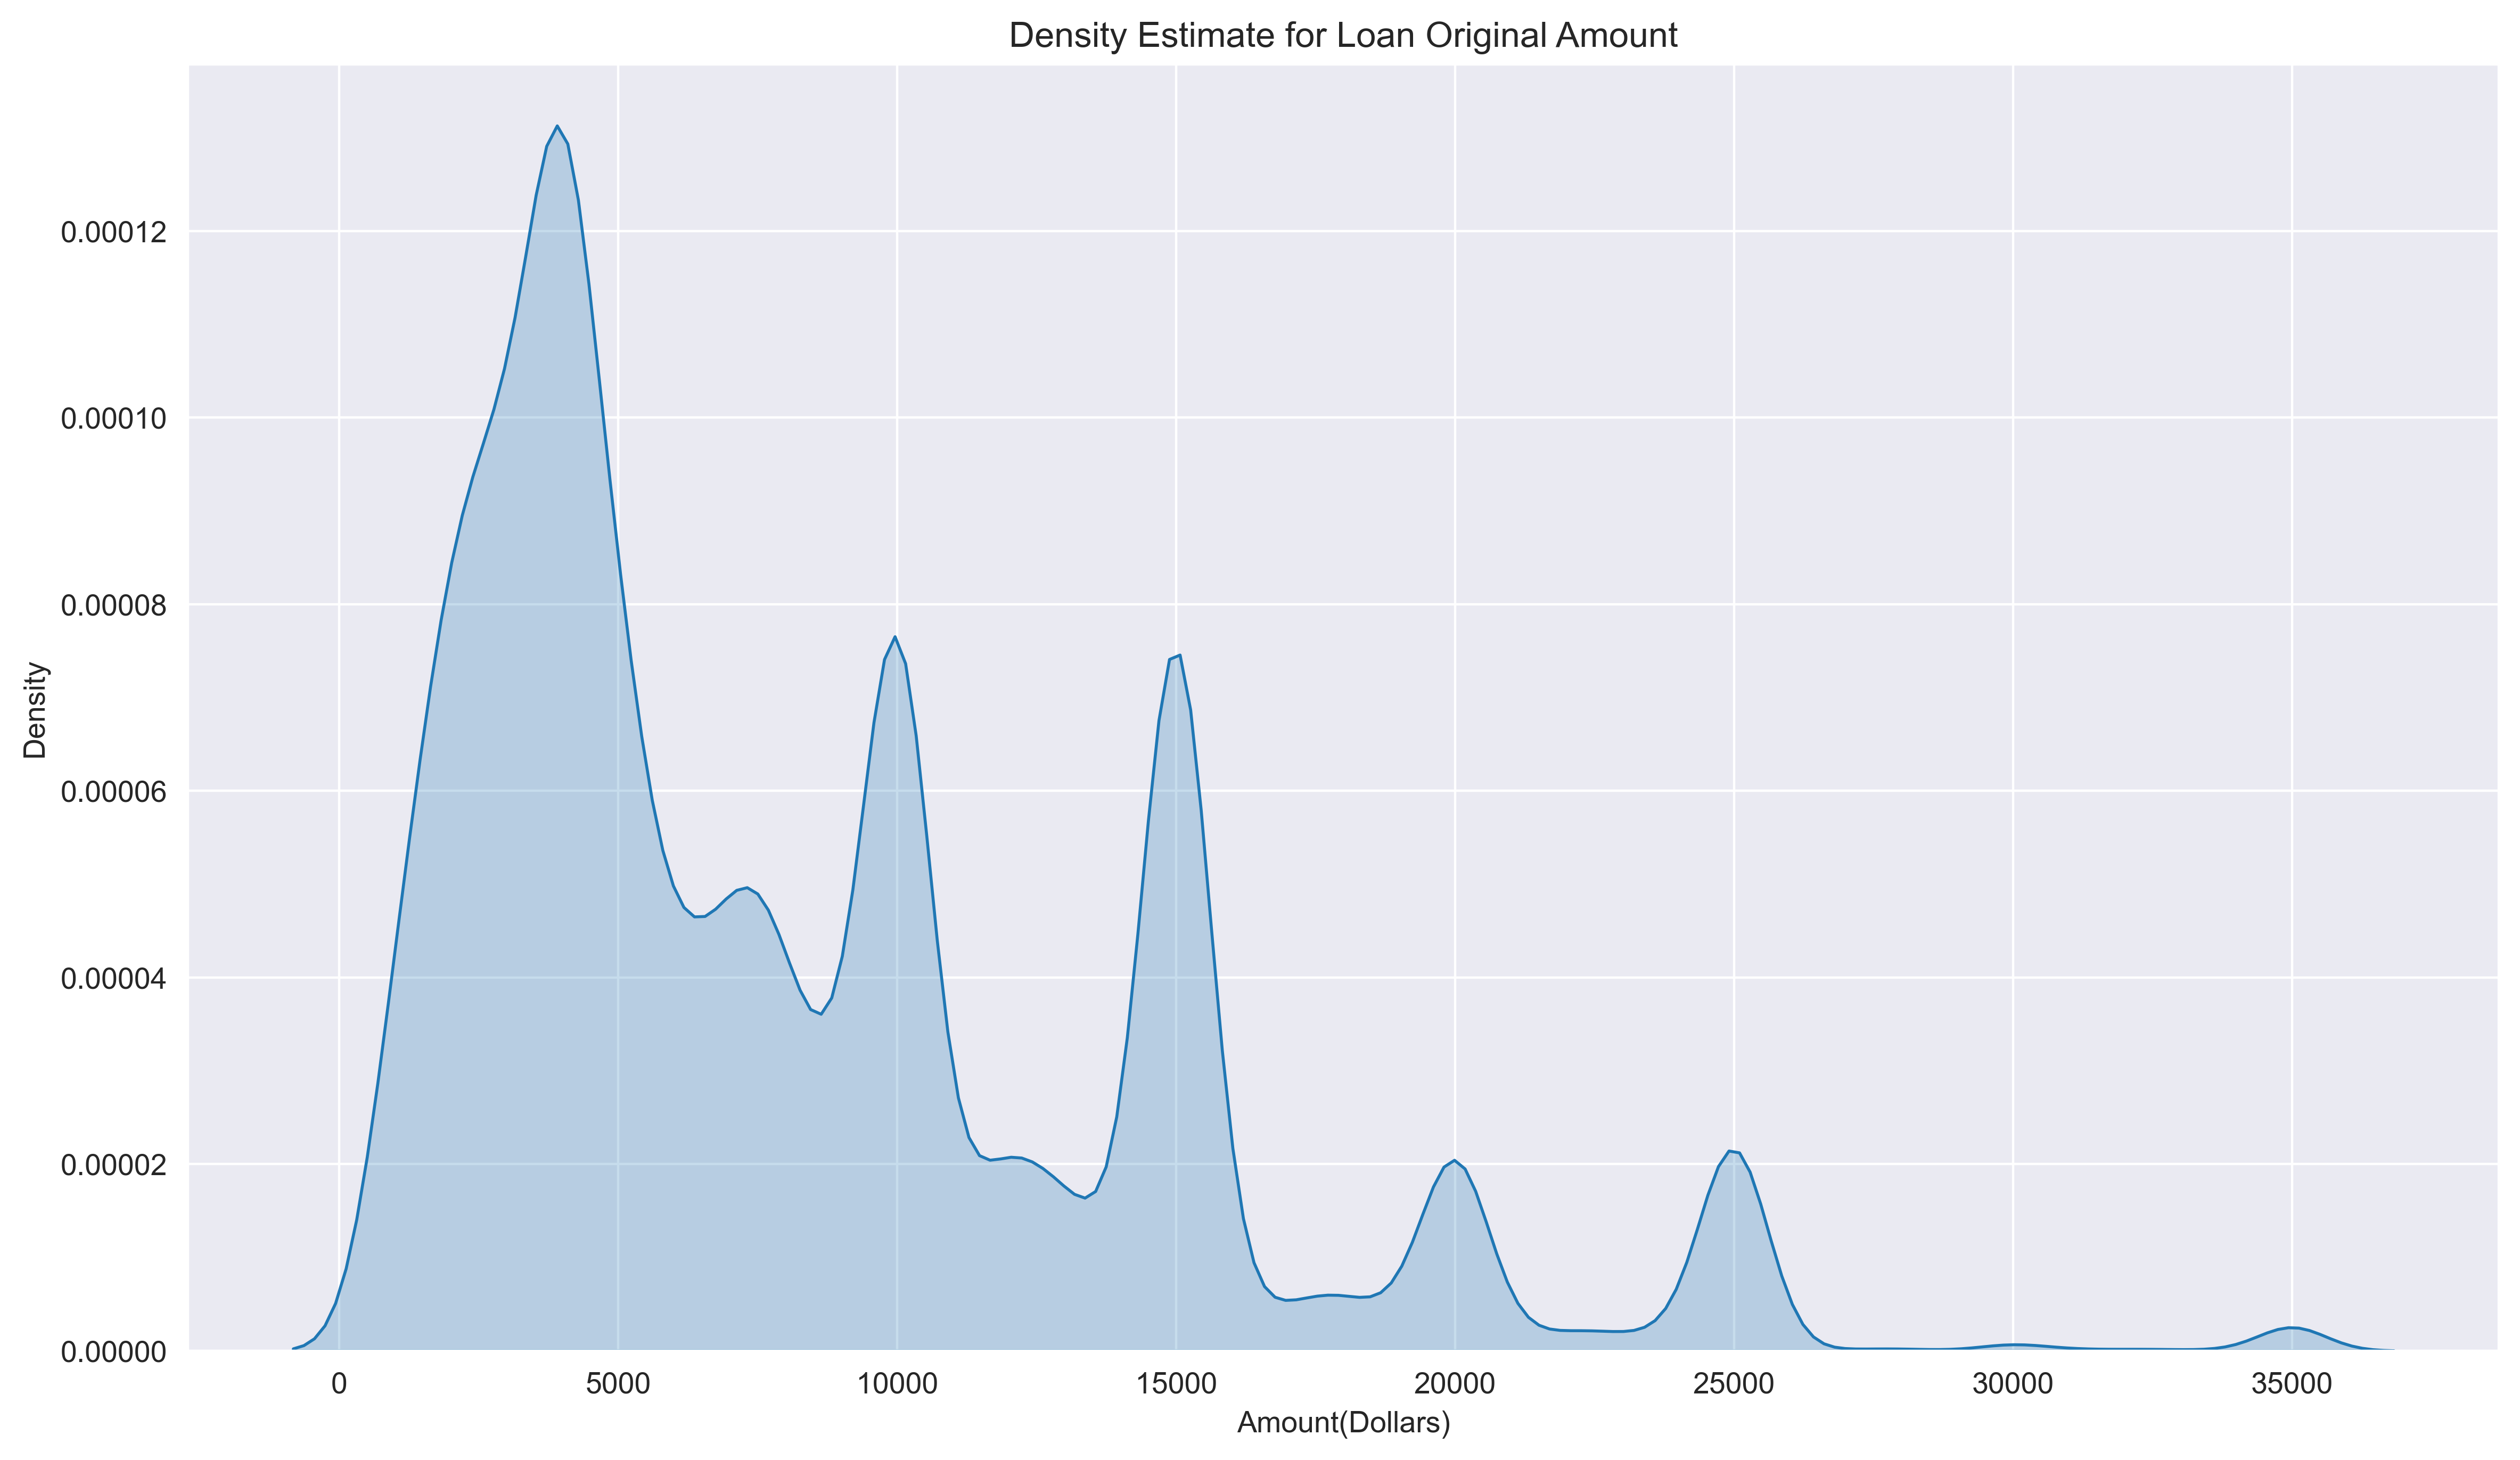

In [7]:
density('LoanOriginalAmount', 'Density Estimate for Loan Original Amount')

### Kernel Density Estimate for Monthly Loan Payment

>The probability that a randomly chosen monthly loan payment will fall between 300 dollars and 500 dollars can be calculated as the area between the density function (graph) and the x-axis in the interval [300, 500]

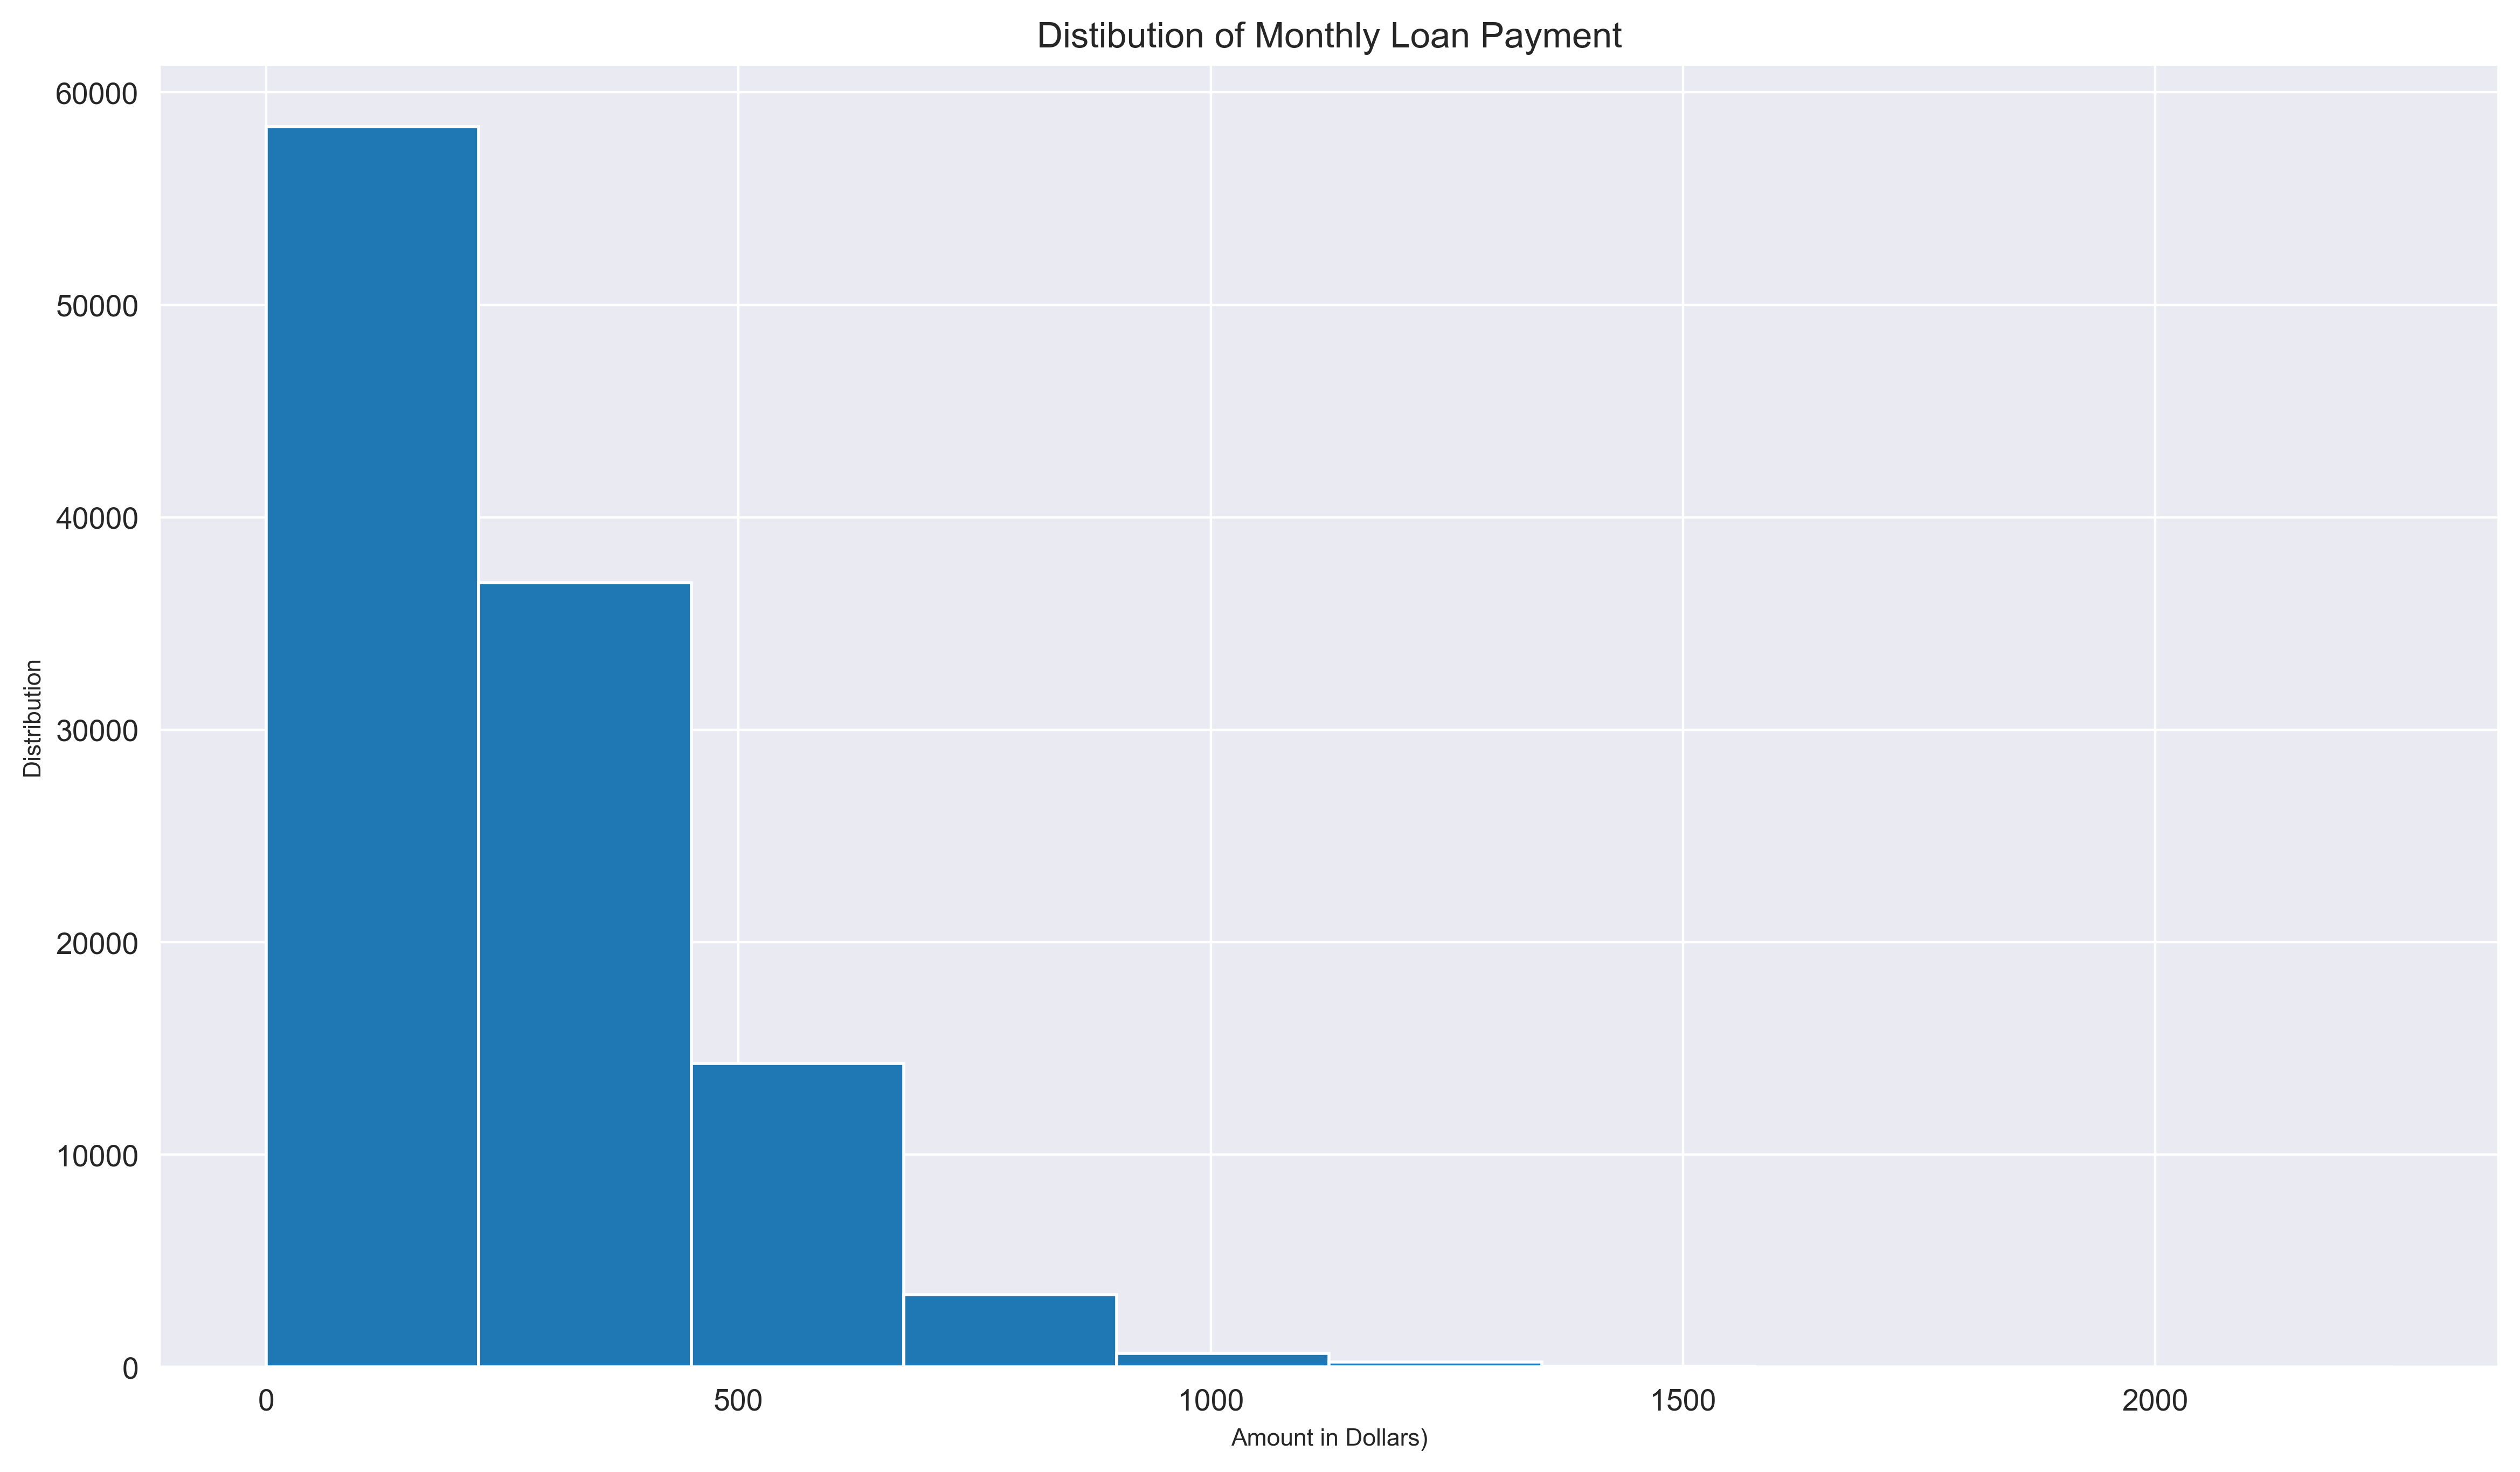

In [8]:
#Monthly loan payment graph
chart(new_df.MonthlyLoanPayment, 'Distibution of Monthly Loan Payment')

## Term of Loan Distribution

> The probability that a randomly chosen monthly loan payment will fall between 300 dollars and 500 dollars can be calculated as the area between the density function (graph) and the x-axis in the interval [300, 500]

In [9]:
def univariate_plot(x, title):
    """plot a countplot"""
    """param: x, title"""
    """return none"""
    plt.figure(figsize=(14,8), dpi = 400)
    ax = sns.countplot(x = x, data = new_df)
    for p in ax.patches:
      ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0, p.get_height()+0.05))
    plt.suptitle(title)
    plt.xticks(rotation = 90)
    plt.plot()   
plt.show();

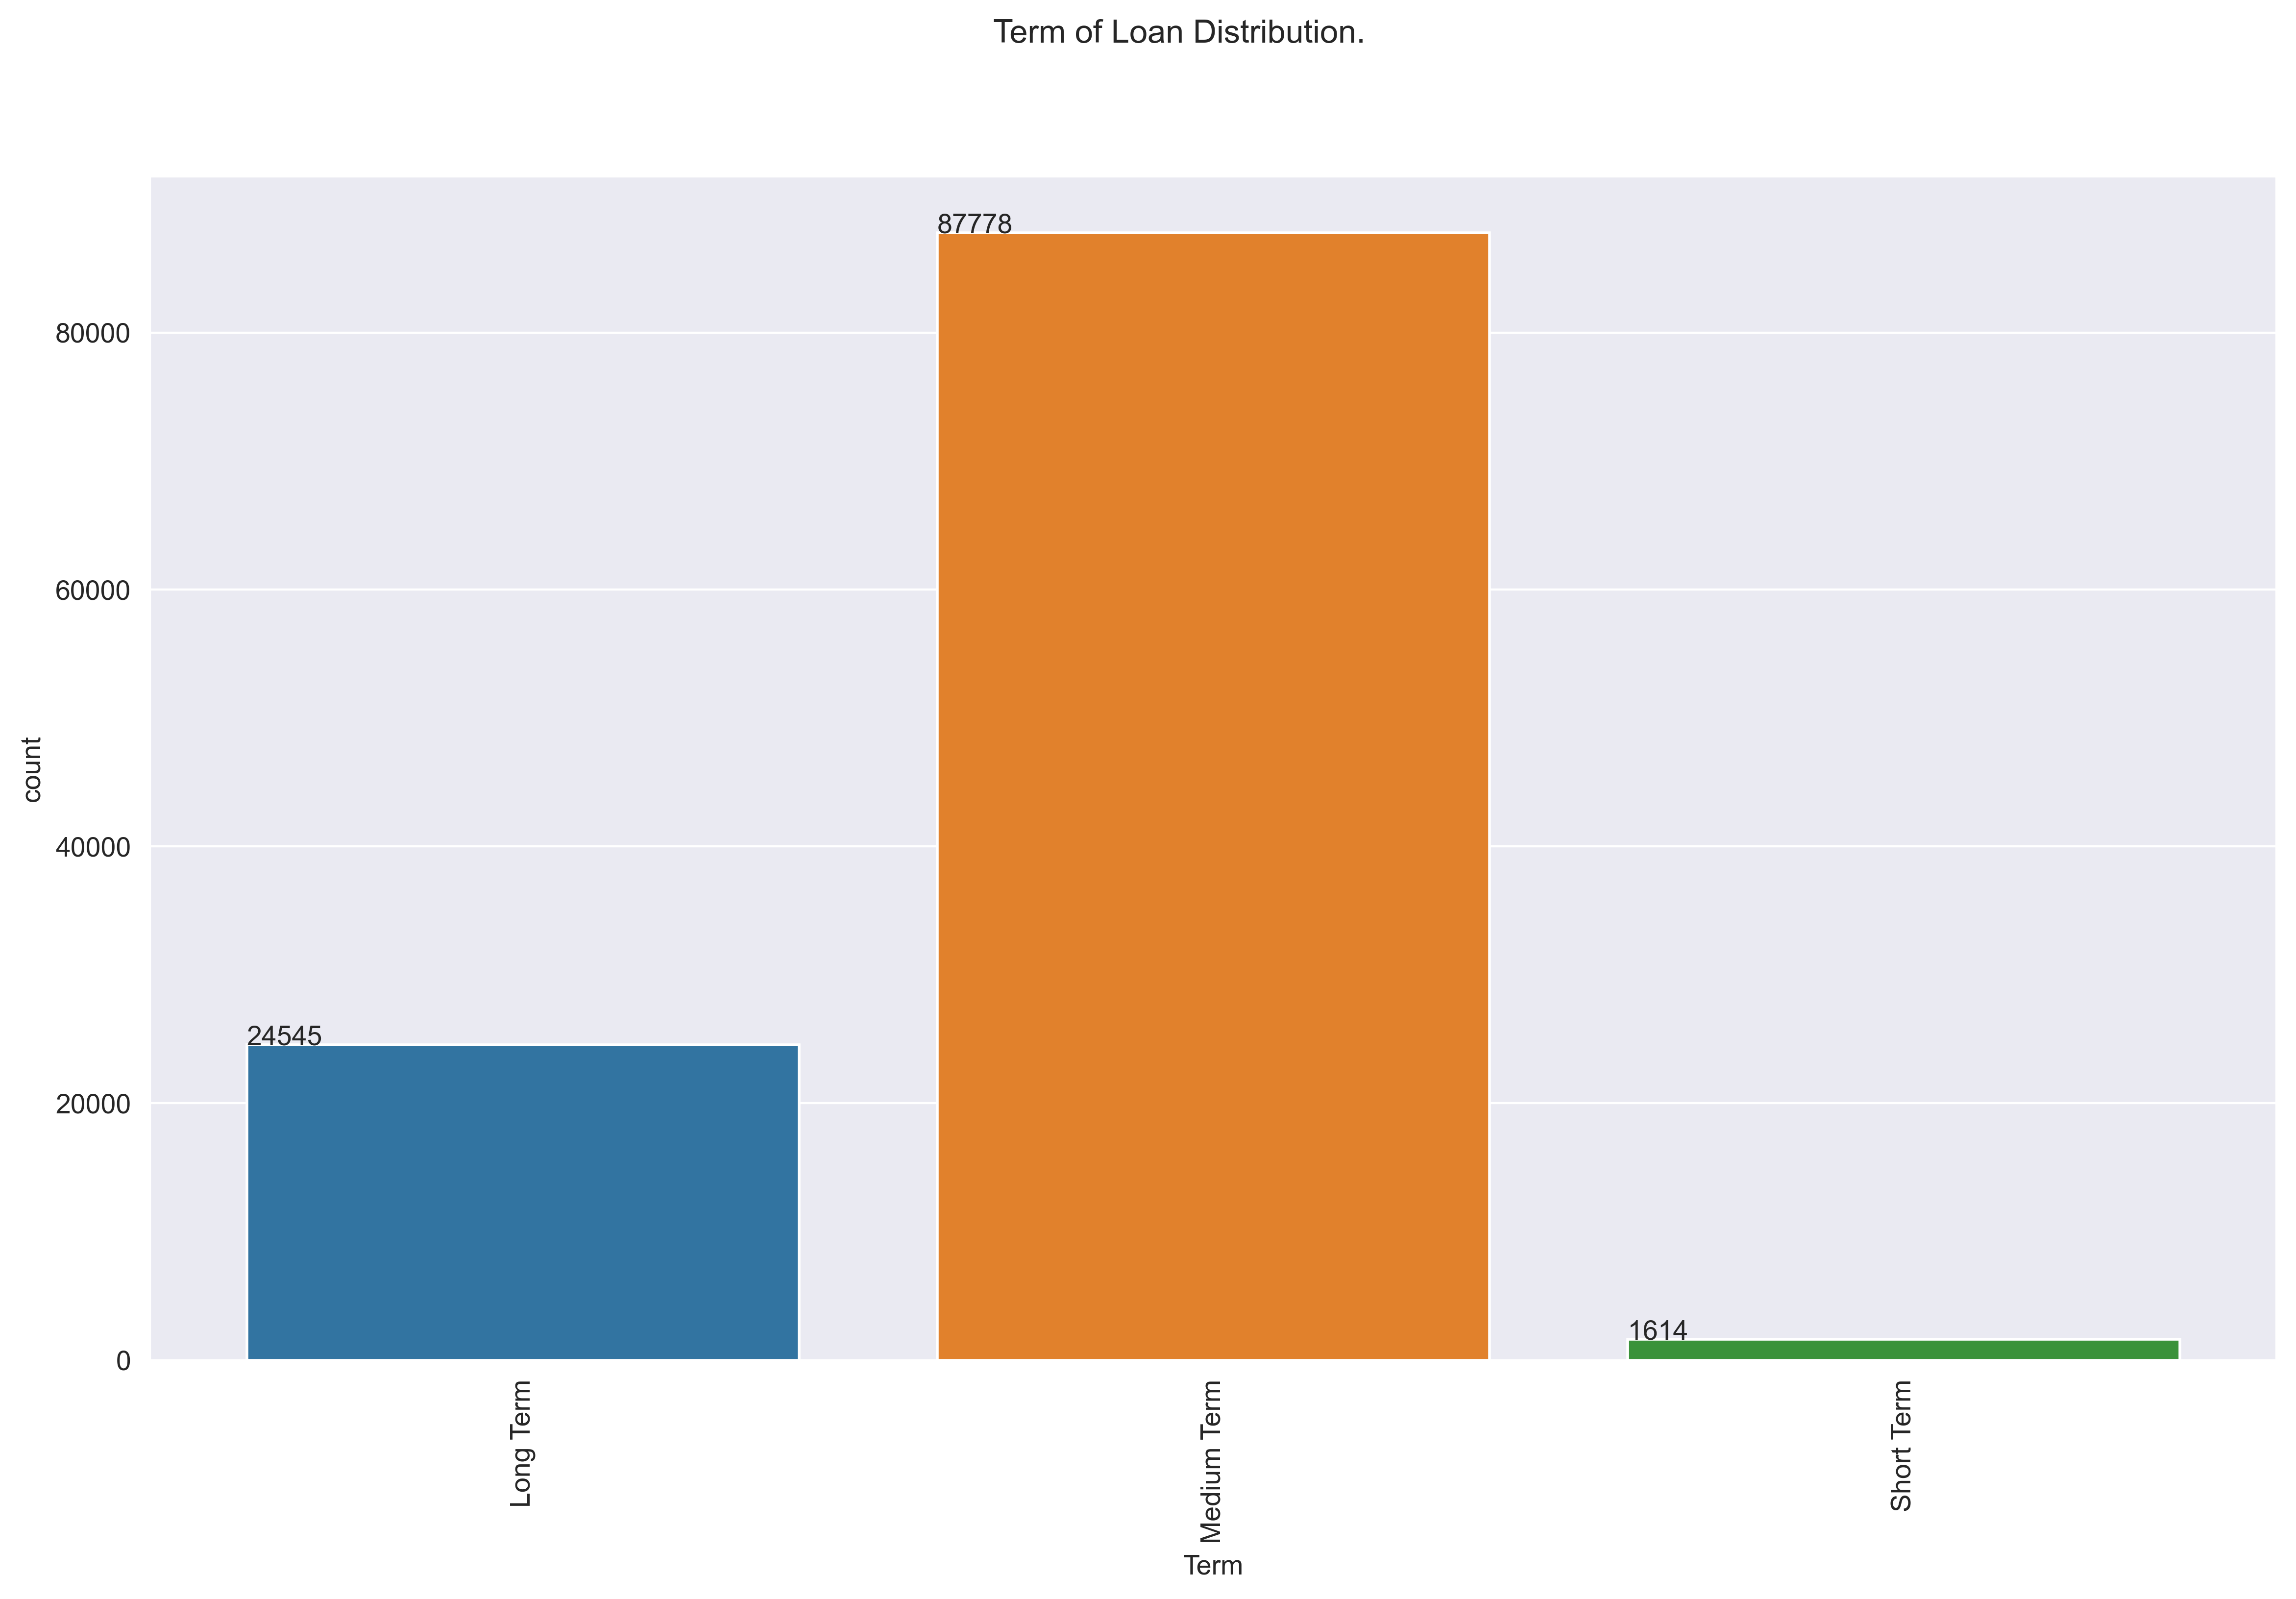

In [10]:
#Loan Term Distribution
univariate_plot('Term','Term of Loan Distribution.')

## Borrower's Employment Status Distribution

> From the above graph, we can infer that those who are employed are the highest borrowers, does this mean the emploees are not getting enough money that suits their lifestlye? or the loan company prefers giving out loans to working class individuals?

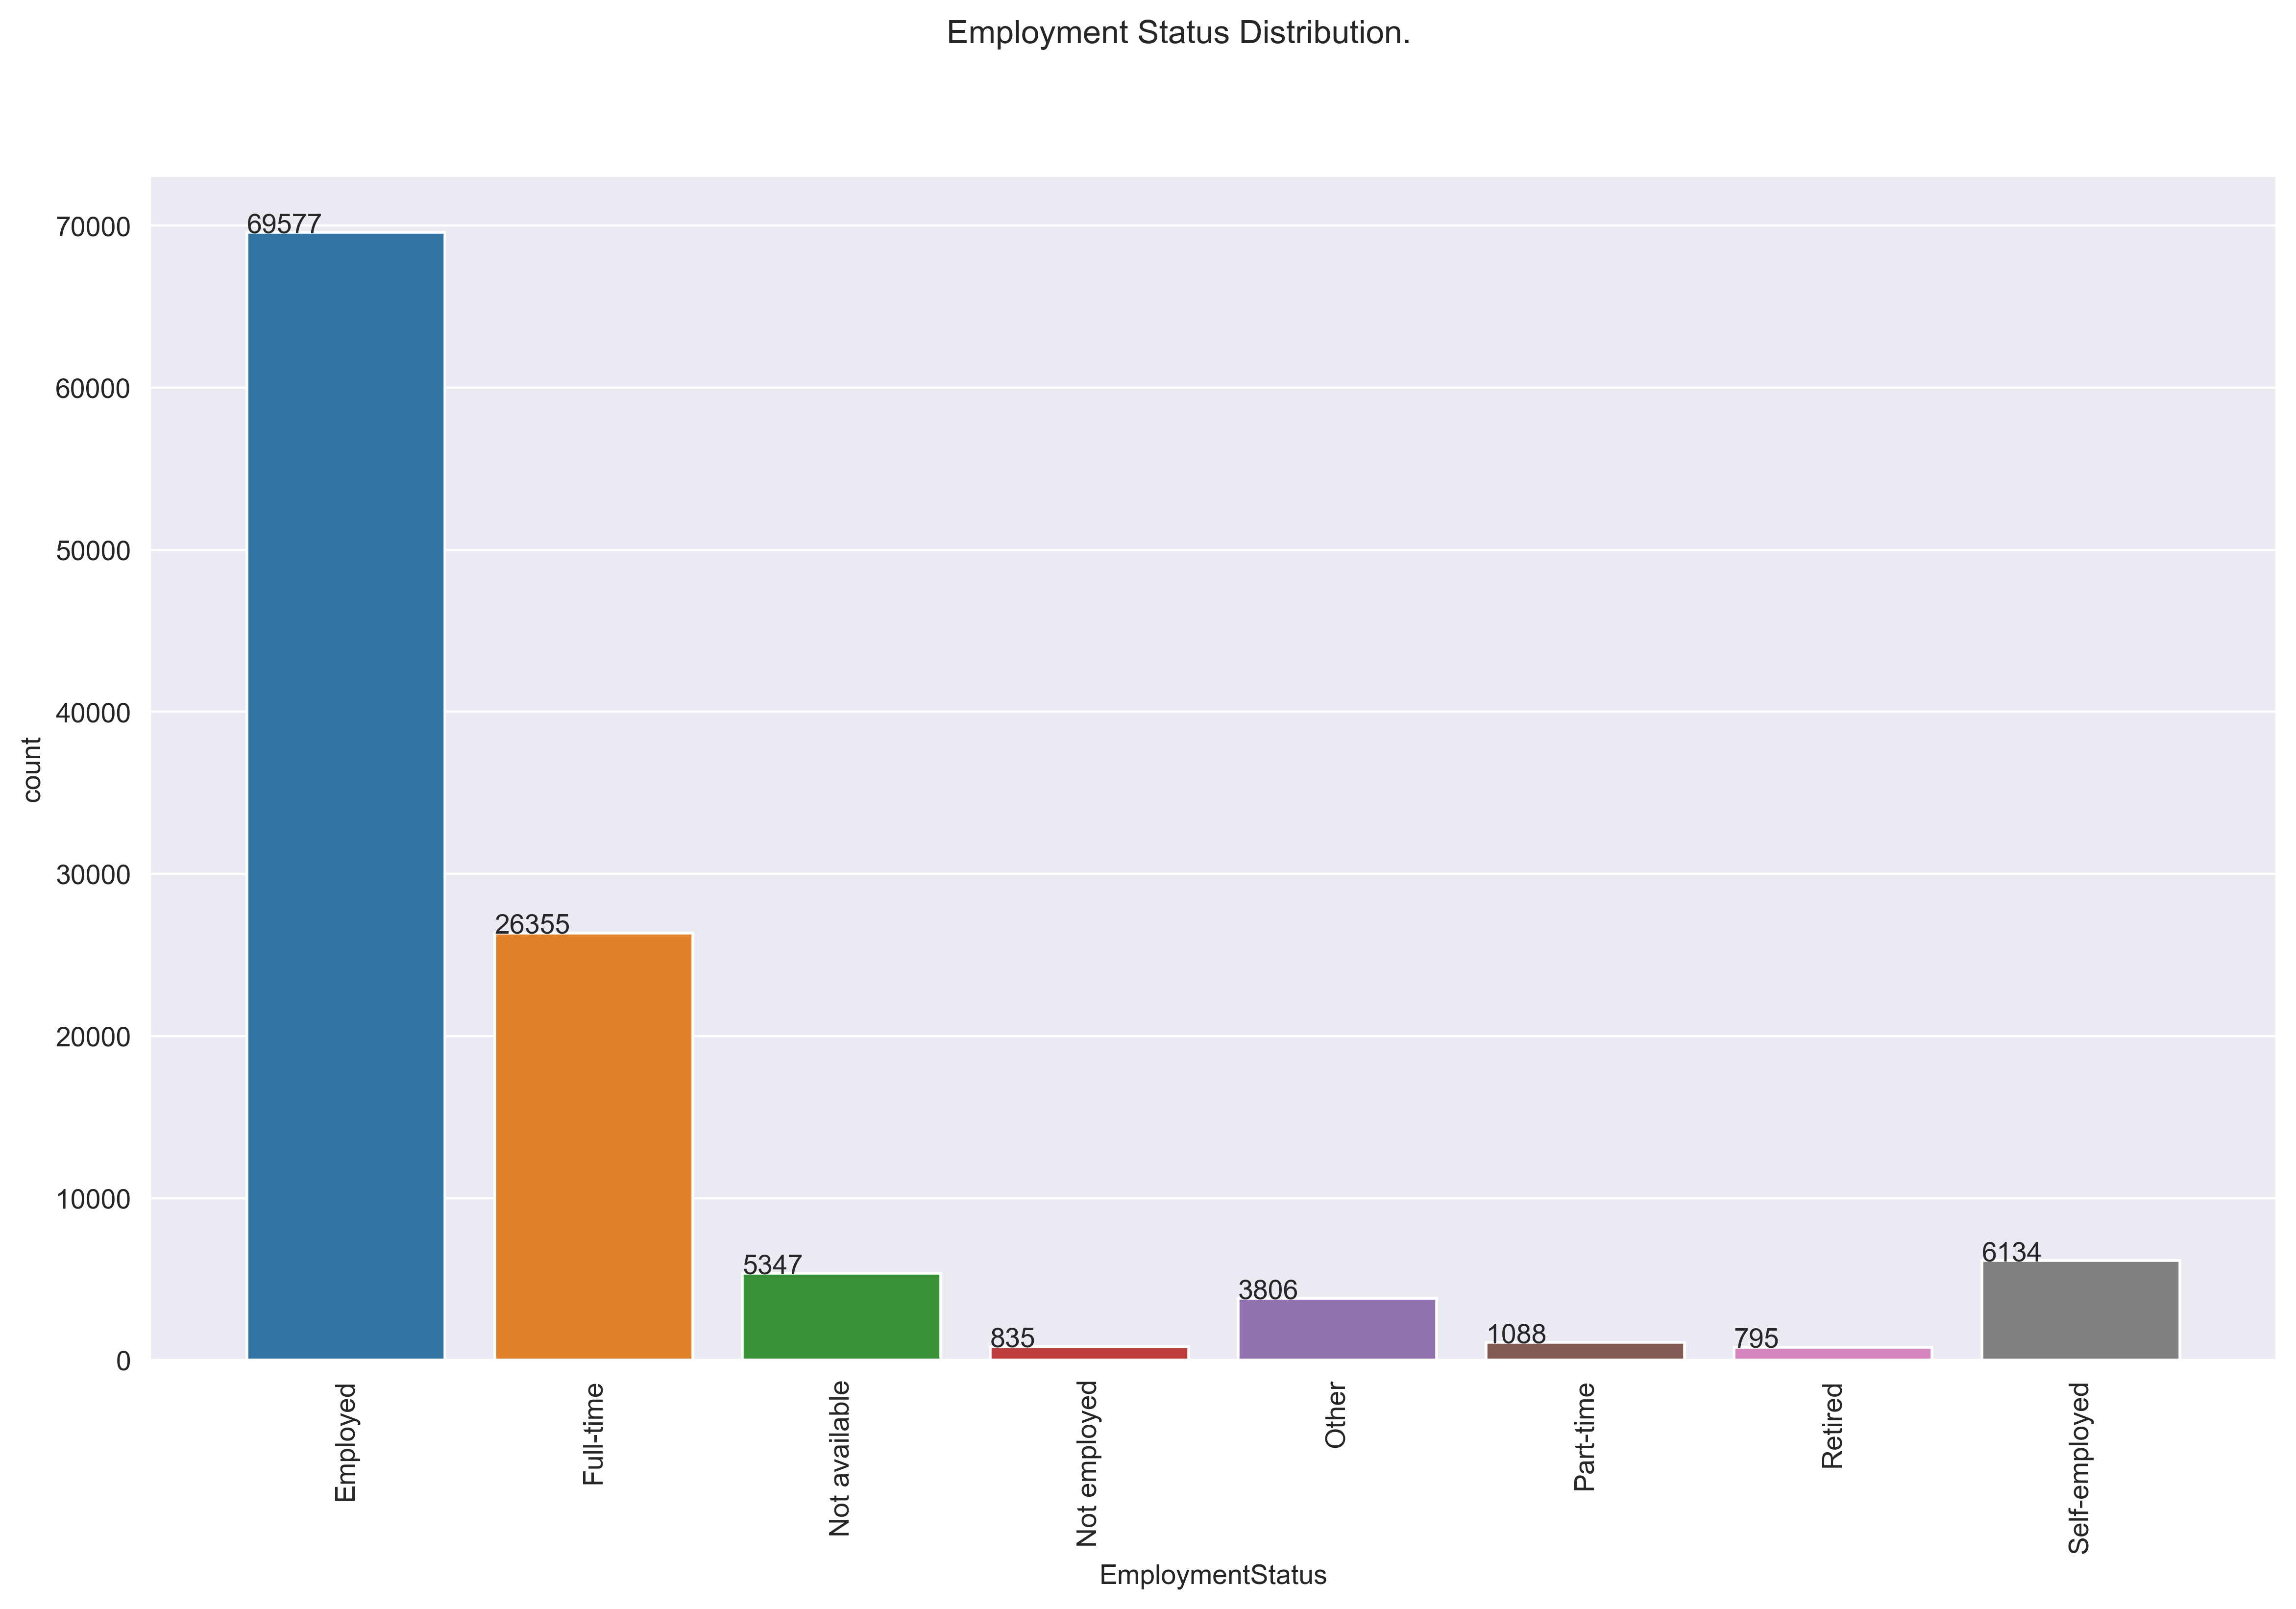

In [11]:
univariate_plot('EmploymentStatus', "Employment Status Distribution.")

## Loan Distribution by Year

> Year 2013 spiked up in number of loan disbursed, before dropping back drastically in 2014 what might cause this? Economic crisis? Inflation?

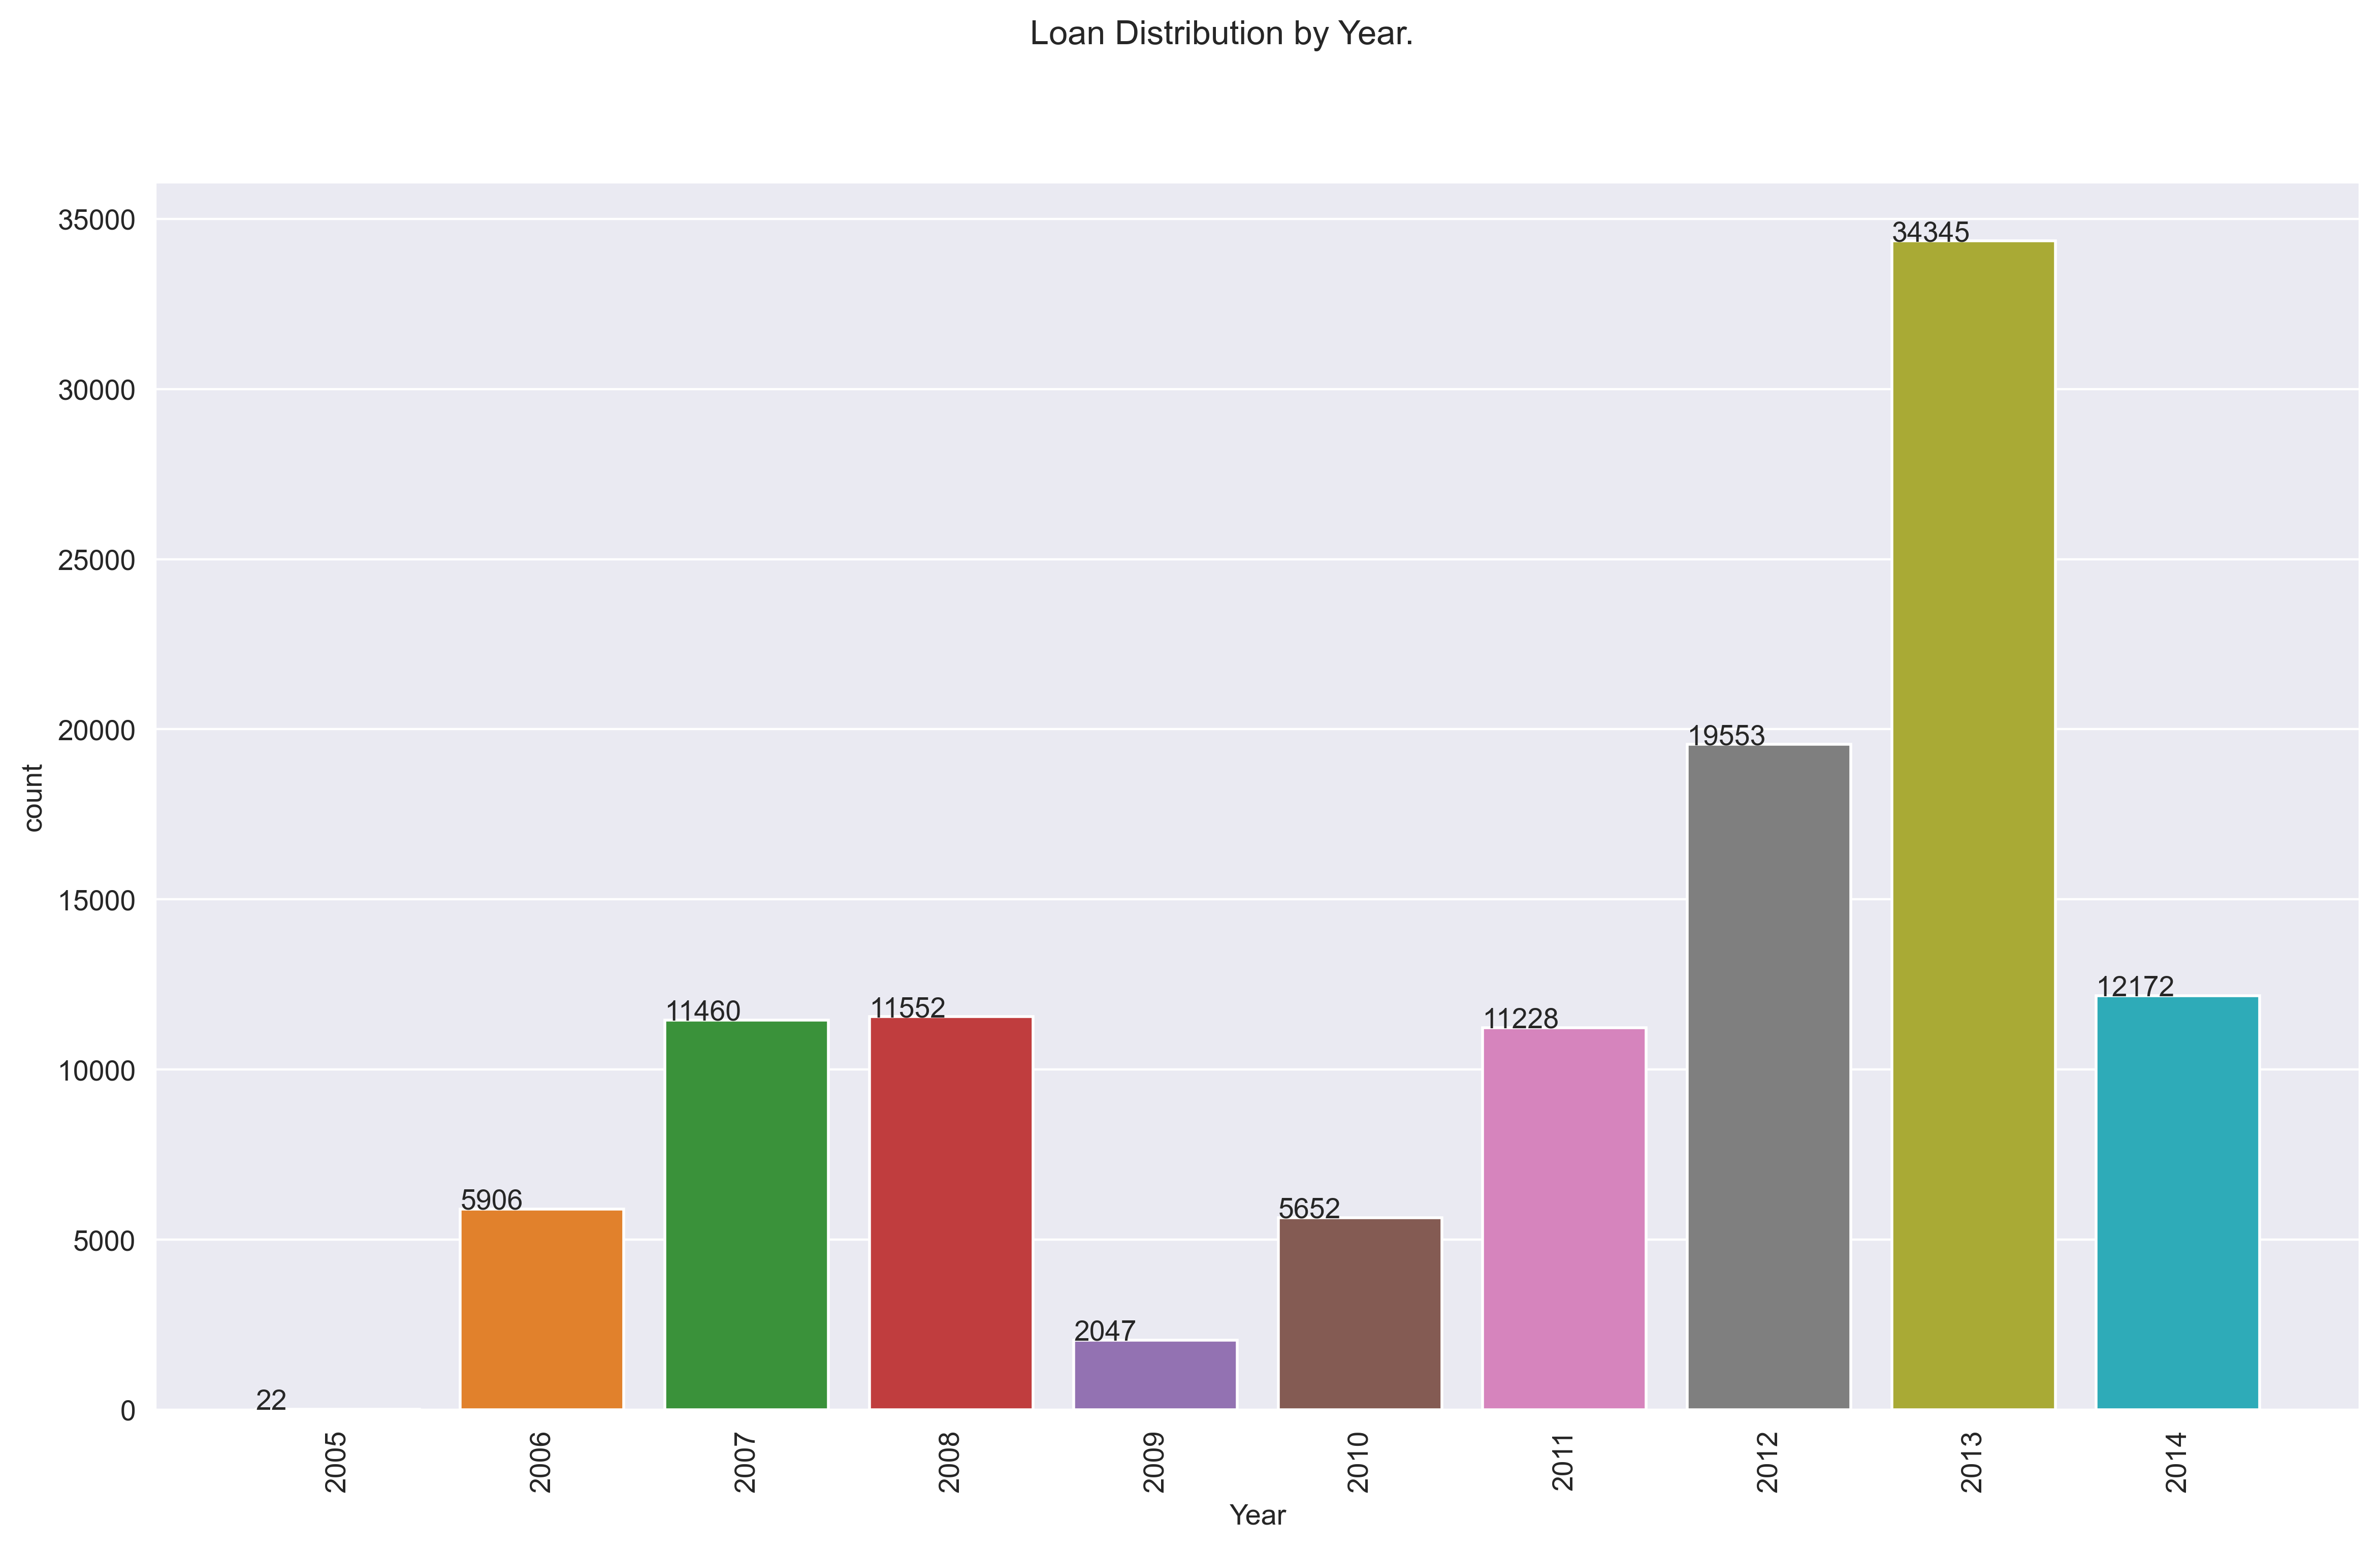

In [12]:
univariate_plot('Year', 'Loan Distribution by Year.')

## Is Borrowere a home owner or not?

The difference between a homeowner and a non homeowner who borrowed is not that specific, but its worth noting that we still tried to find out

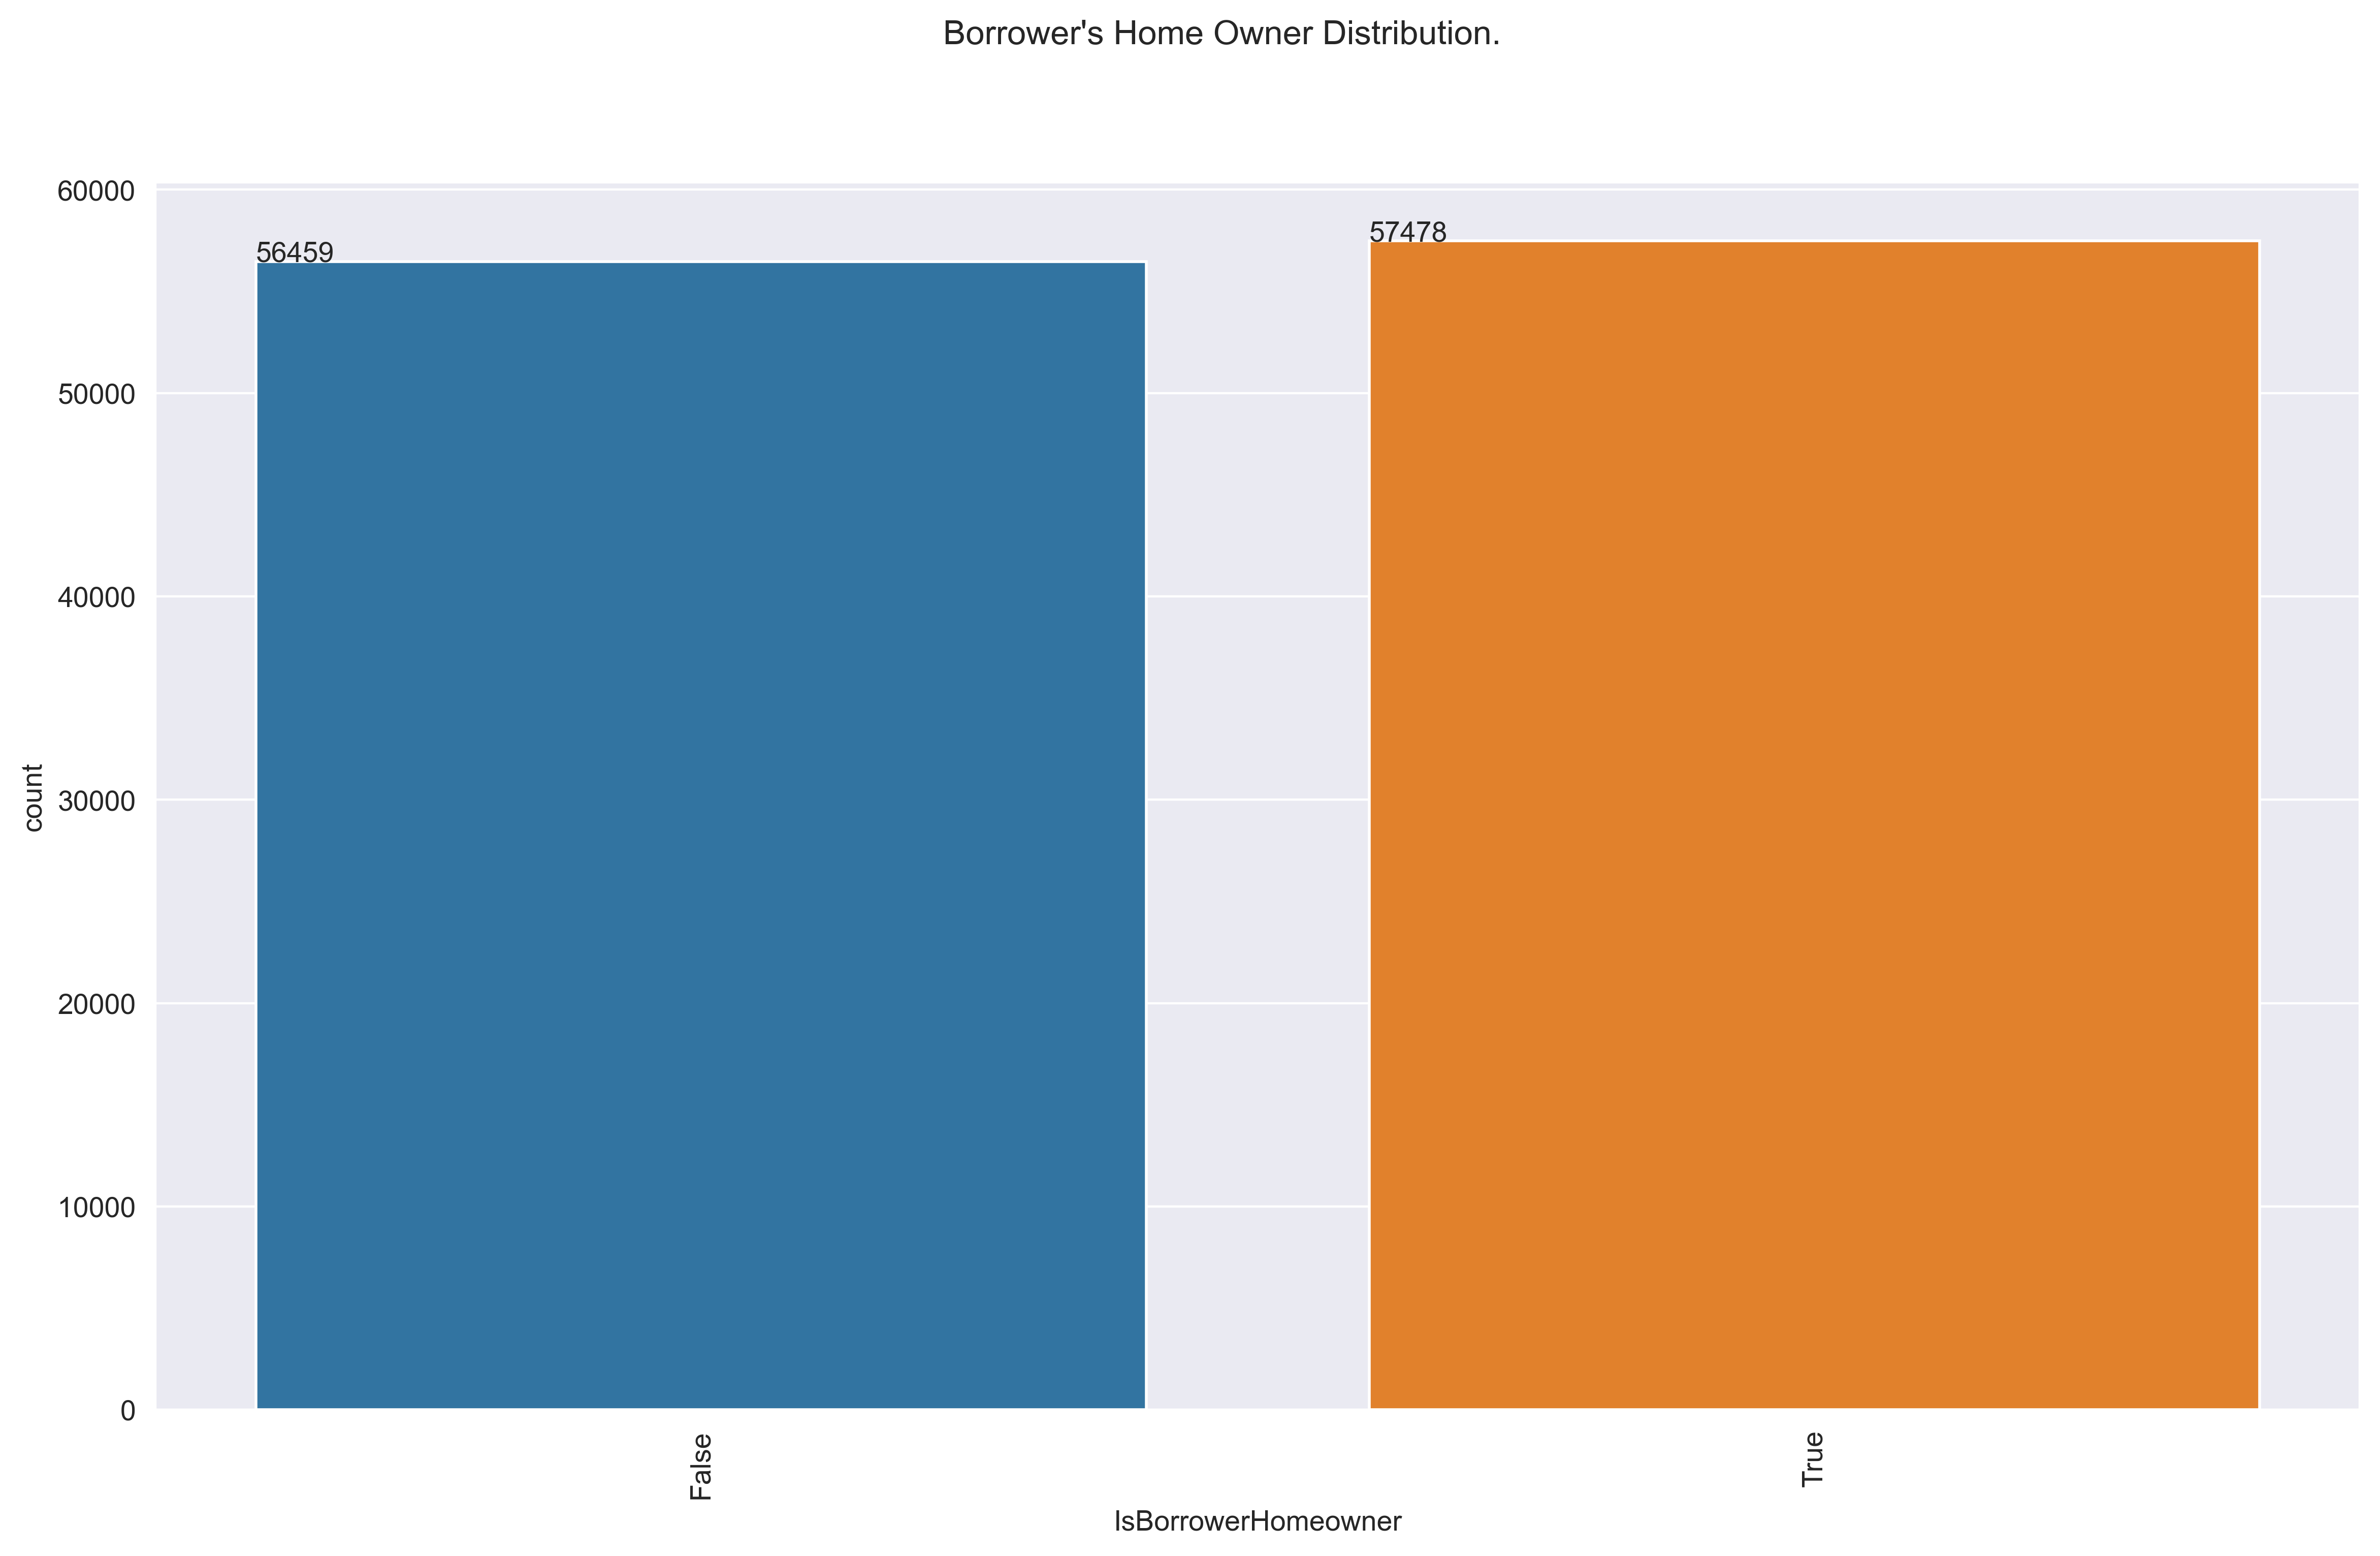

In [13]:
univariate_plot('IsBorrowerHomeowner', "Borrower's Home Owner Distribution.")

## Line Graph Depicting Relationship Between Monthly Loan Payment and Loan Original Amount

> There is no positive correlation between the two variables as the figure above shows that majority of the values fall between 0 and 35000 dollars

In [14]:
# define a function to plot lineplot
def line_plot(x, y, title):
    """plot a line plot"""
    """param: x, y, title"""
    """return none"""
    plt.figure(figsize=(14,8), dpi= 400)
    p = sns.lineplot(x = x, y = y, data = new_df)
    plt.title(title); 

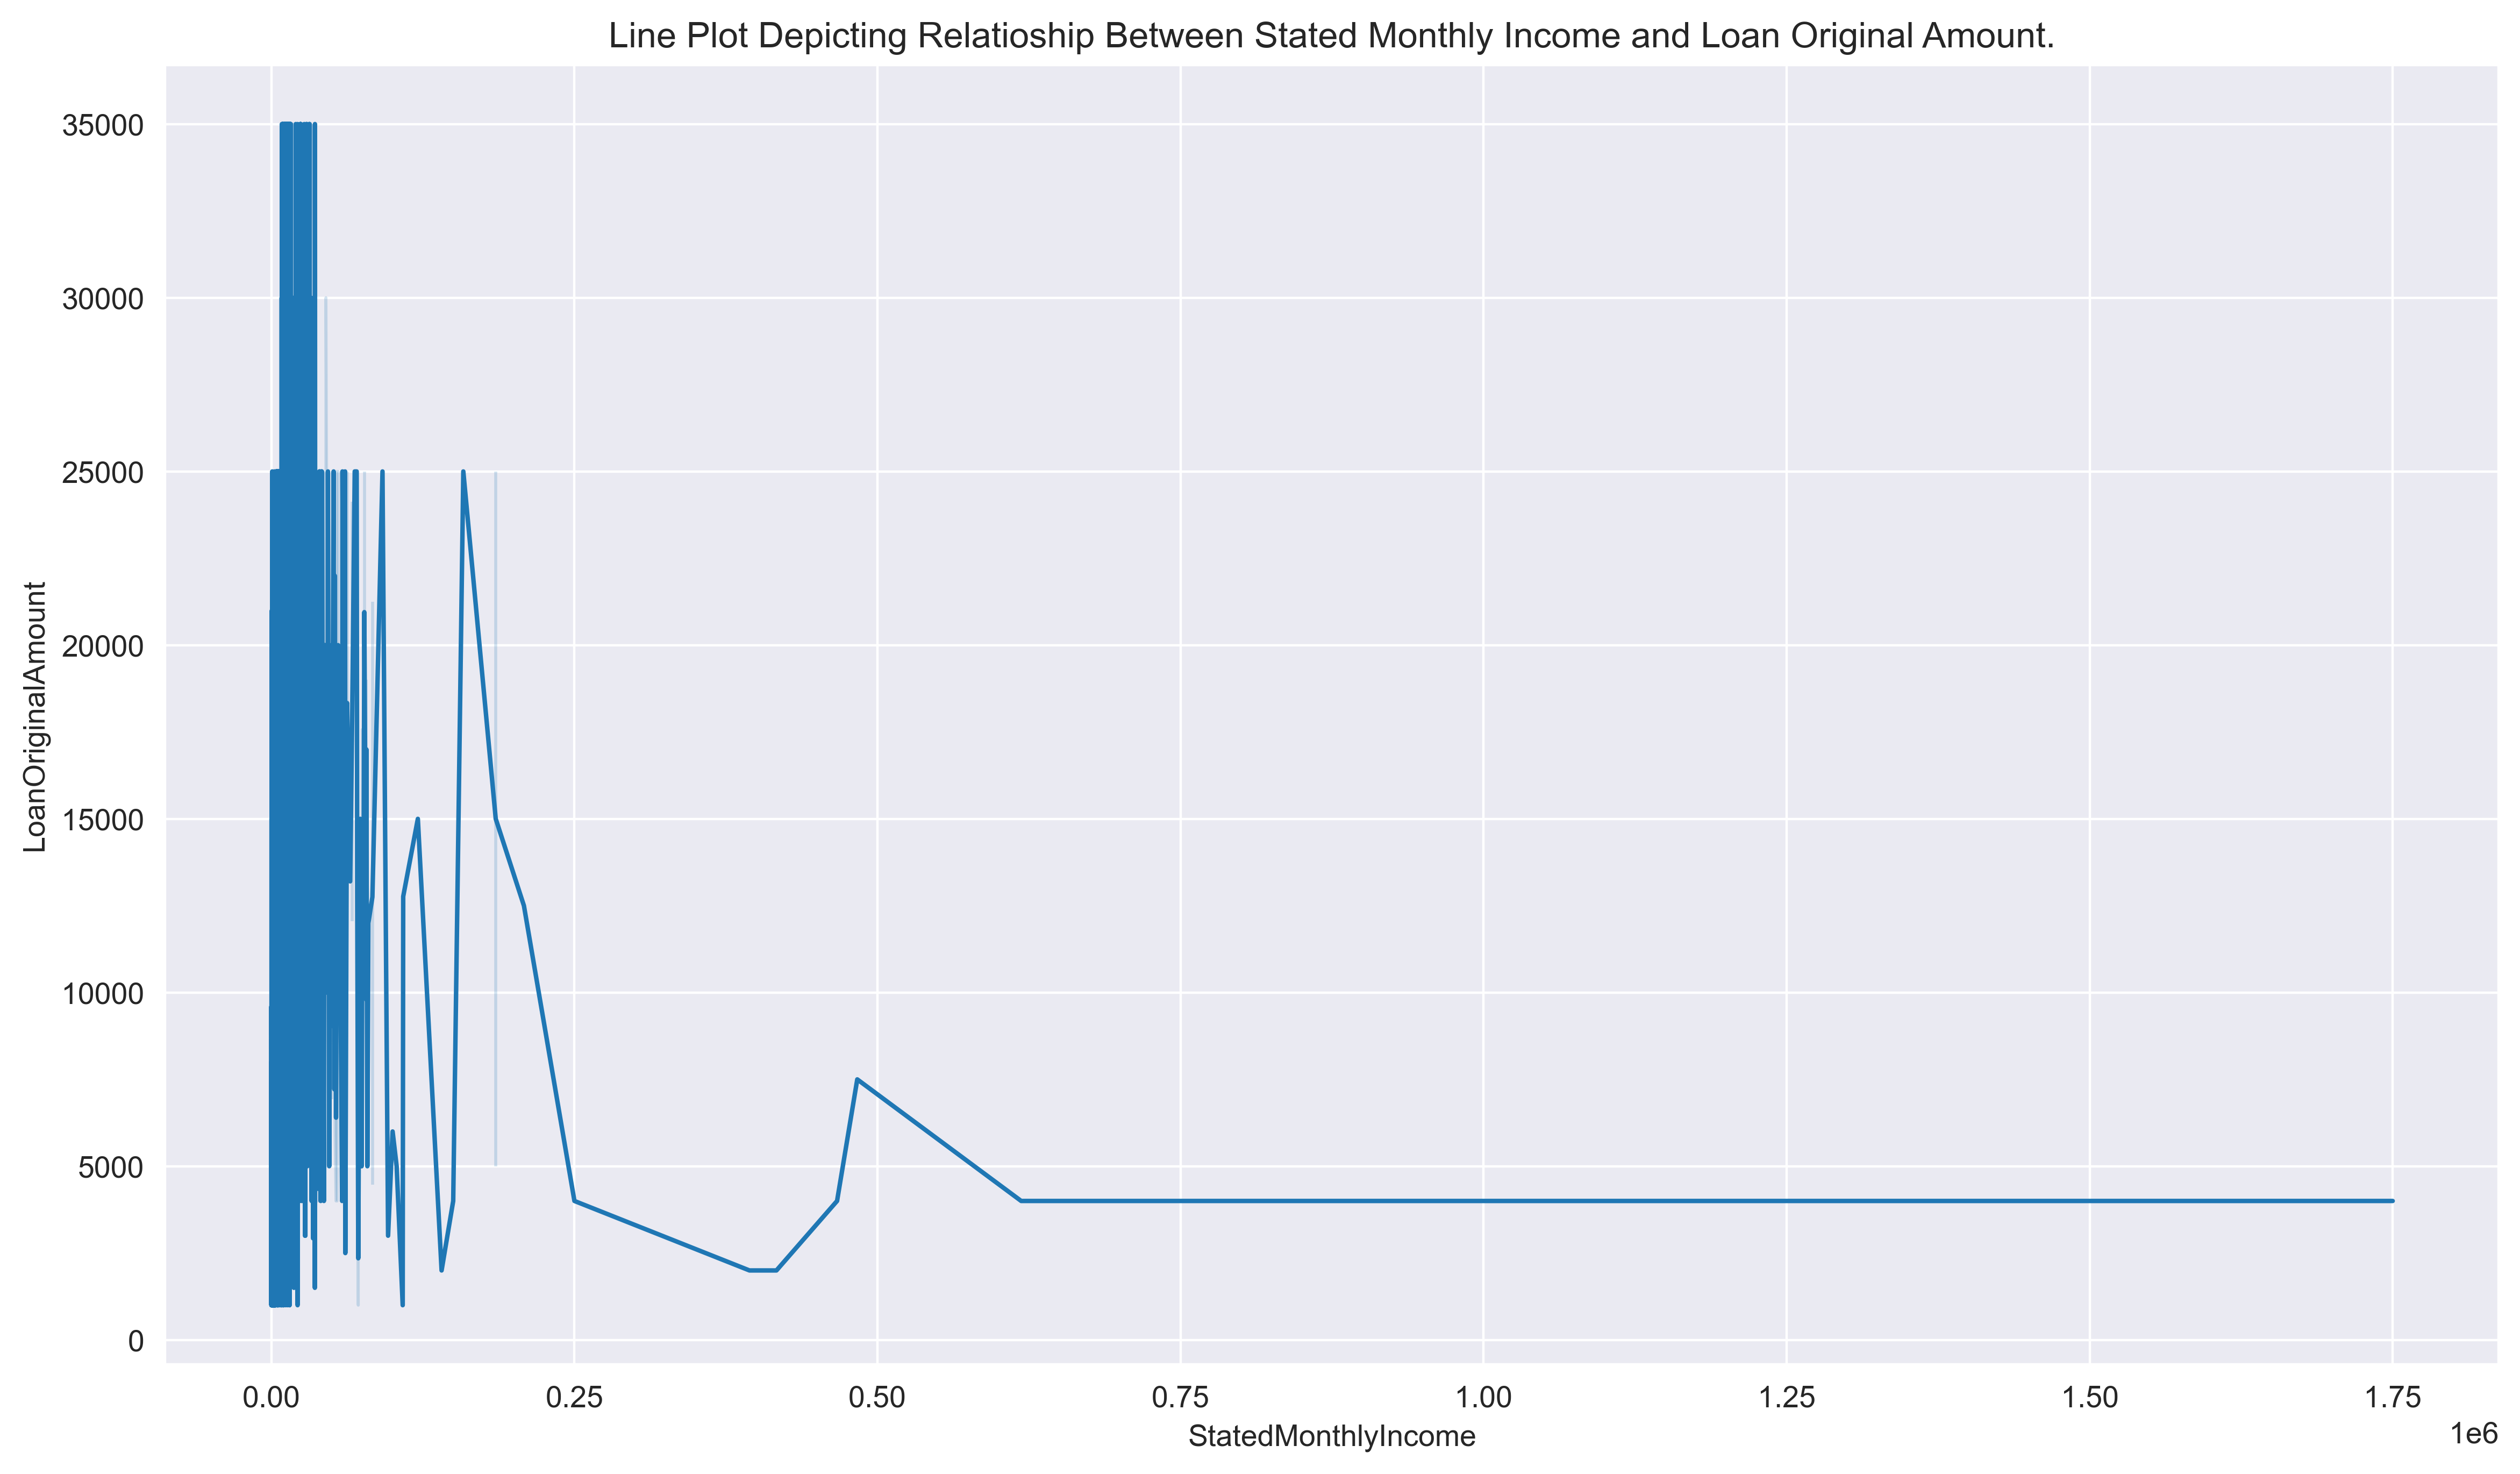

In [15]:
# call func to plot lineplot of stated monthly income against loan original amount
line_plot('StatedMonthlyIncome', 'LoanOriginalAmount', 'Line Plot Depicting Relatioship Between Stated Monthly Income and Loan Original Amount.')

### Line Plot Depicting Relationship Between Monthly Loan Payment and Loan Original Amount

> As the original loan amount increases the monthly loan payment also increases, meaning there is a rush to pay off the loan as quickly as possible which means, there is a positive correlation between our two variables.

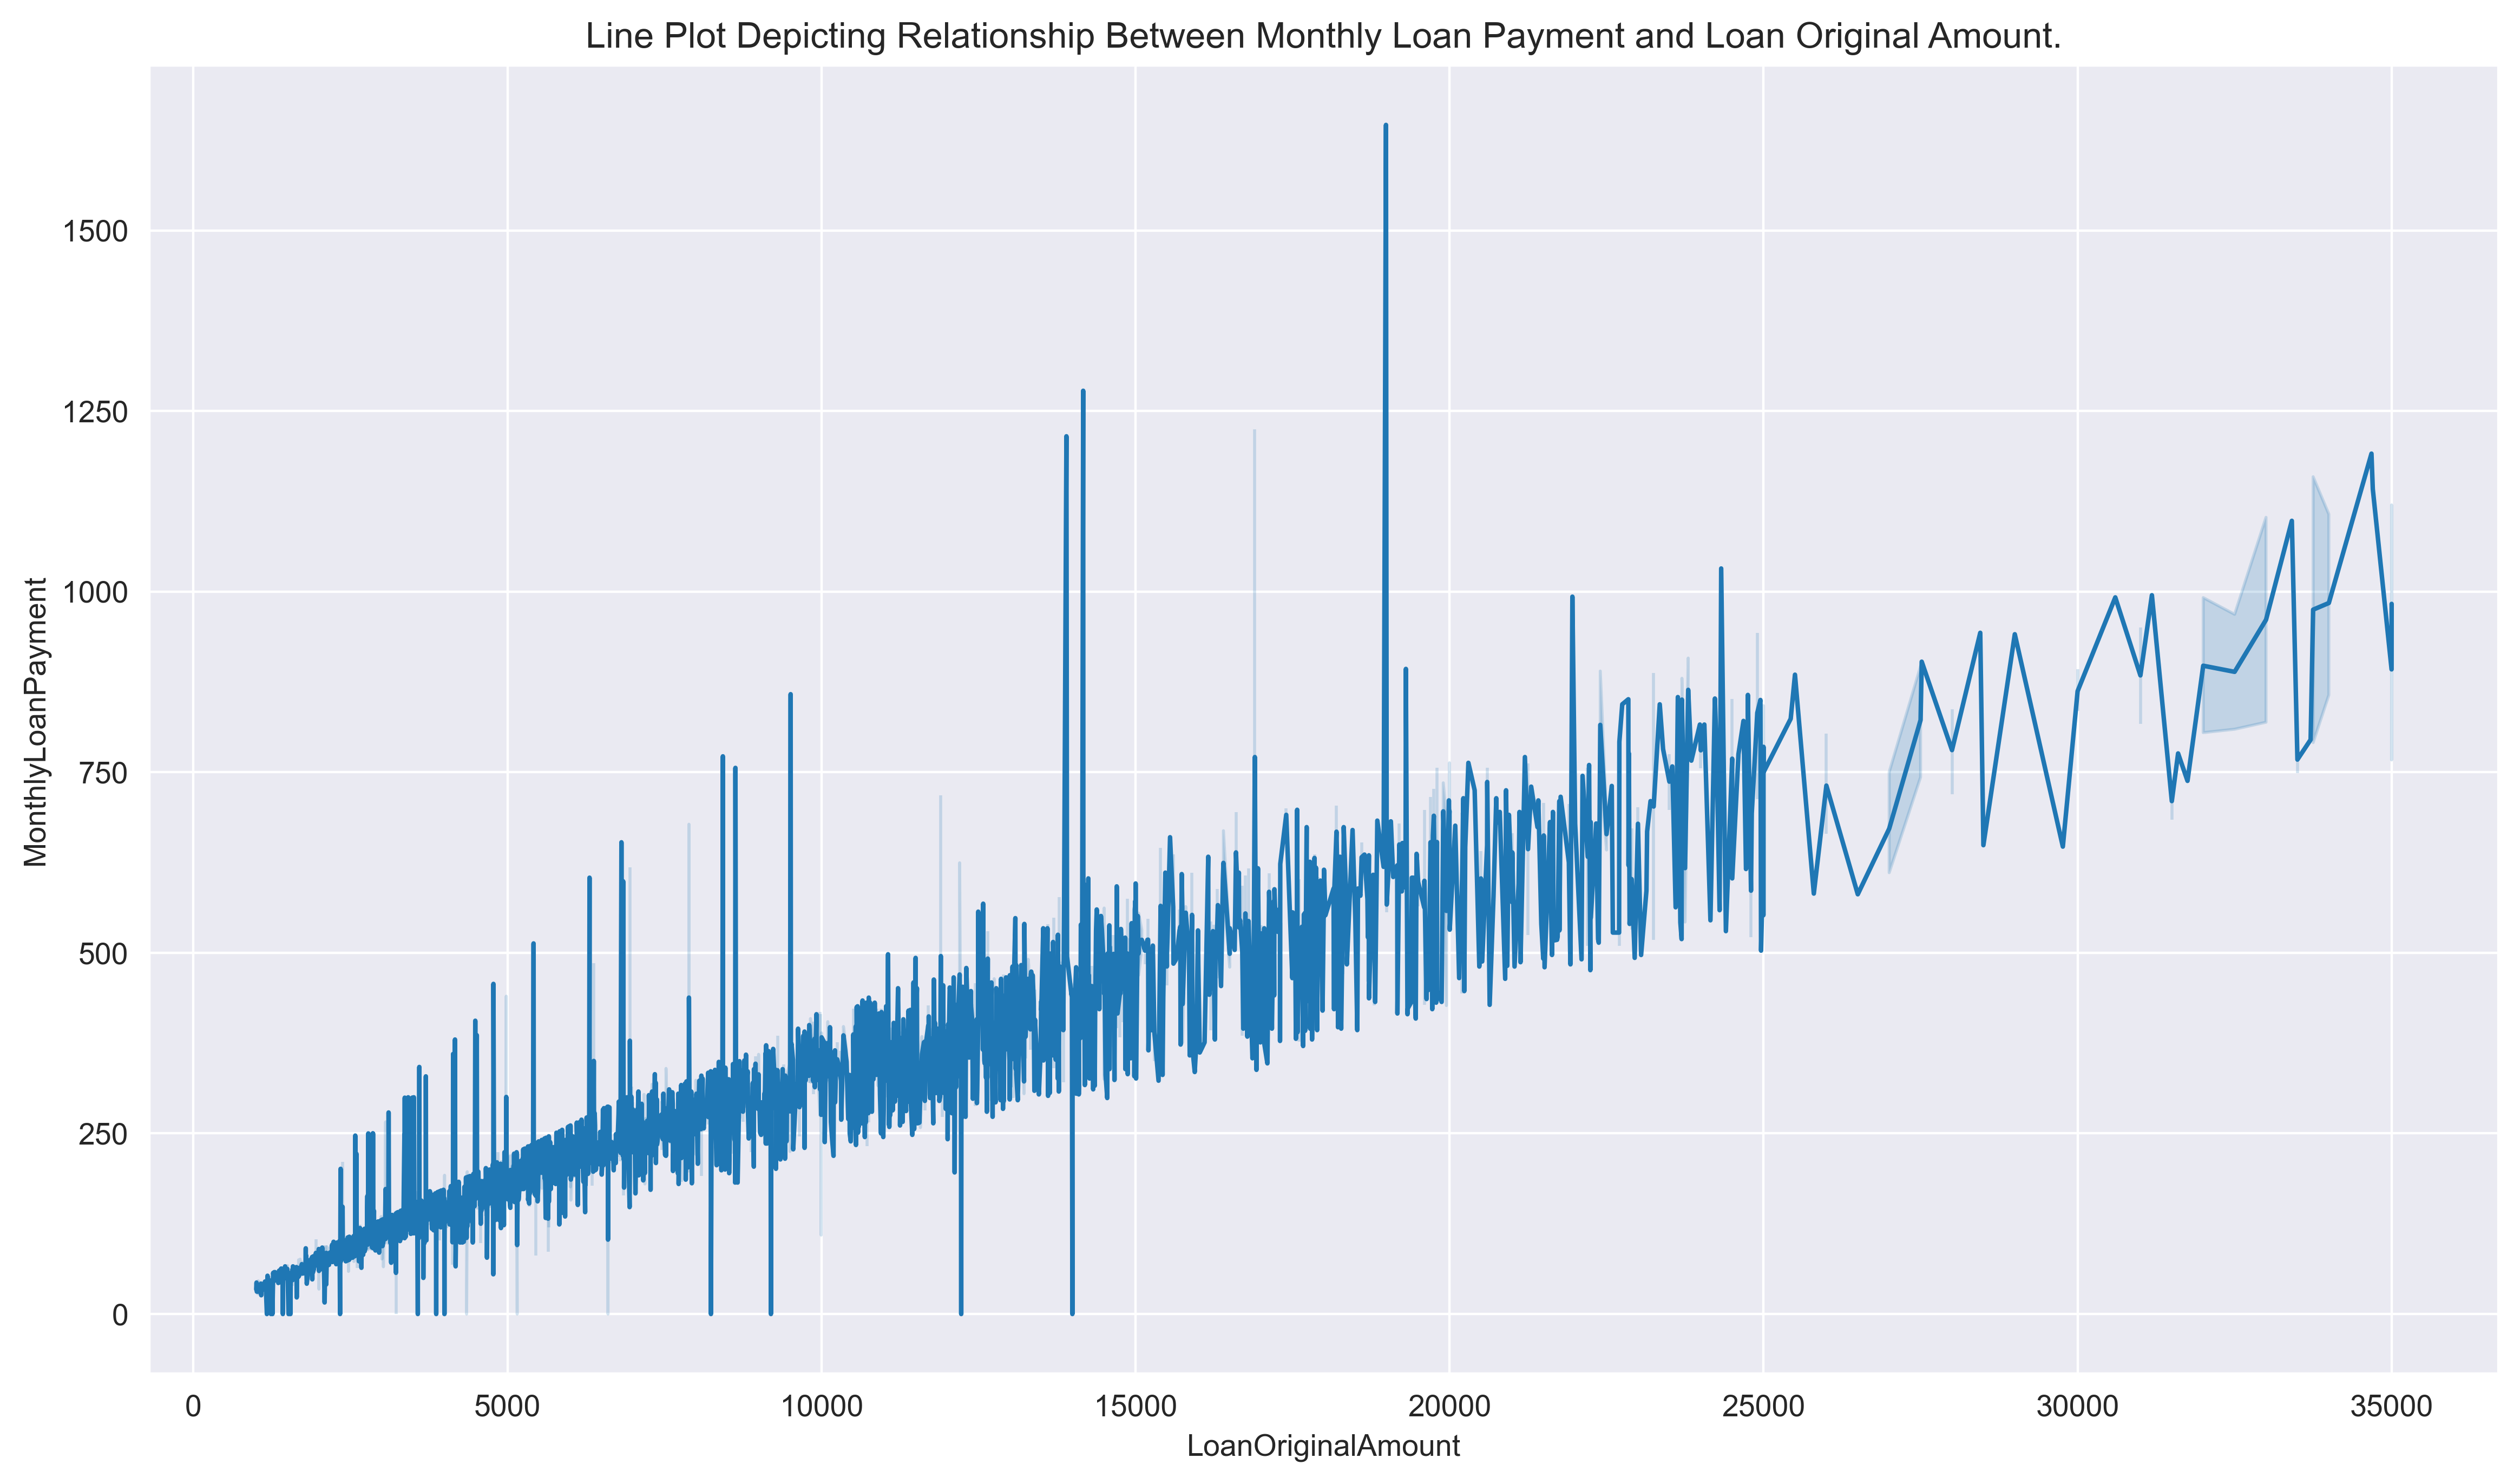

In [16]:
#Function to depict lineplot of monthly loan payment against original loan amount
line_plot('LoanOriginalAmount', 'MonthlyLoanPayment', 'Line Plot Depicting Relationship Between Monthly Loan Payment and Loan Original Amount.')

## Original Loan Amount Against Current Days of Delinquency Group by Loan Term

> There exists a positive relationship between the loan original amount and monthly loan payment, the data point(s) are spread across the plot categorized by term of loan.

In [17]:
# Function to plot scatter plot loan original amount against current days of delinquency 
def scatter(hue, title):
    """plot a scatterplot"""
    """param: hue, title"""
    """return none"""
    plt.figure(figsize=(14,8), dpi = 450)
    sns.scatterplot(x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', hue = hue, data = new_df)
    plt.xlabel('Loan Original Amount(Dollars)')
    plt.ylabel('Monthly Loan Payment(Dollars)')
    plt.title(title);

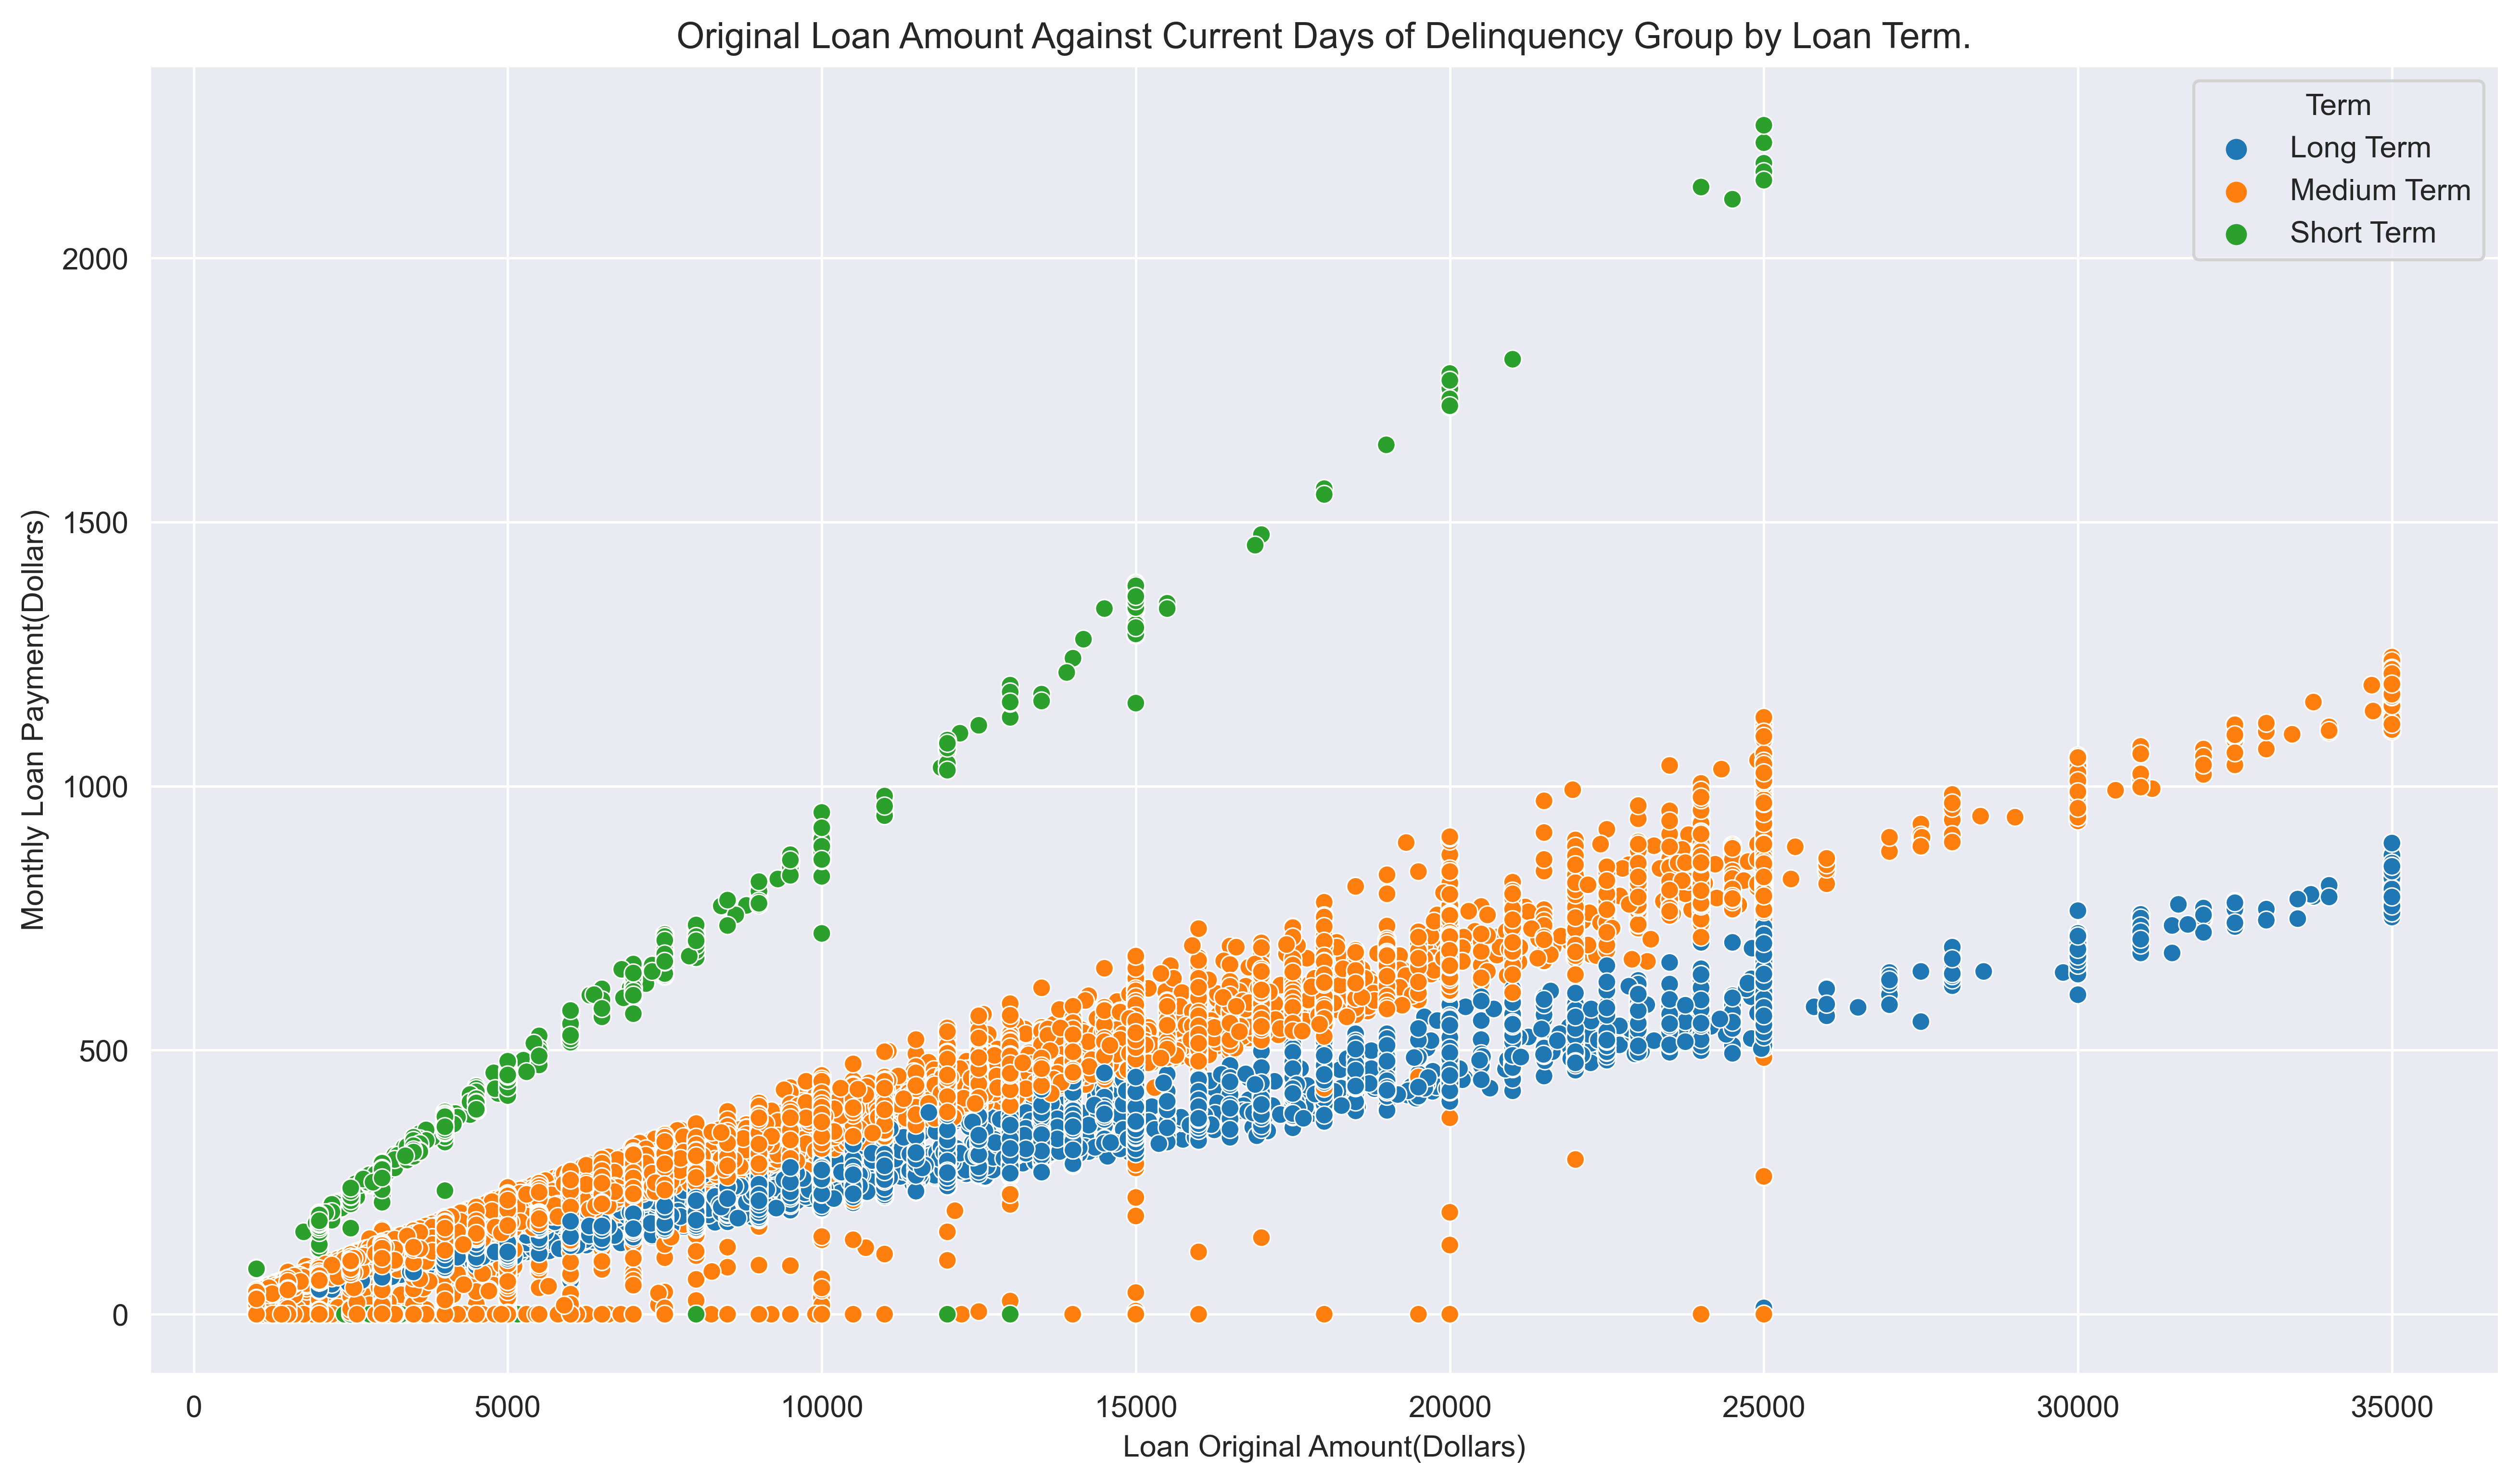

In [18]:
#Function to PLot Scatter plot on group by loan term
scatter('Term', 'Original Loan Amount Against Current Days of Delinquency Group by Loan Term.')

## Original Loan Amount Against Current Days of Delinquency Group by Loan Year

> Original Loan Amount Against Current Days of Delinquency Group by Loan Year

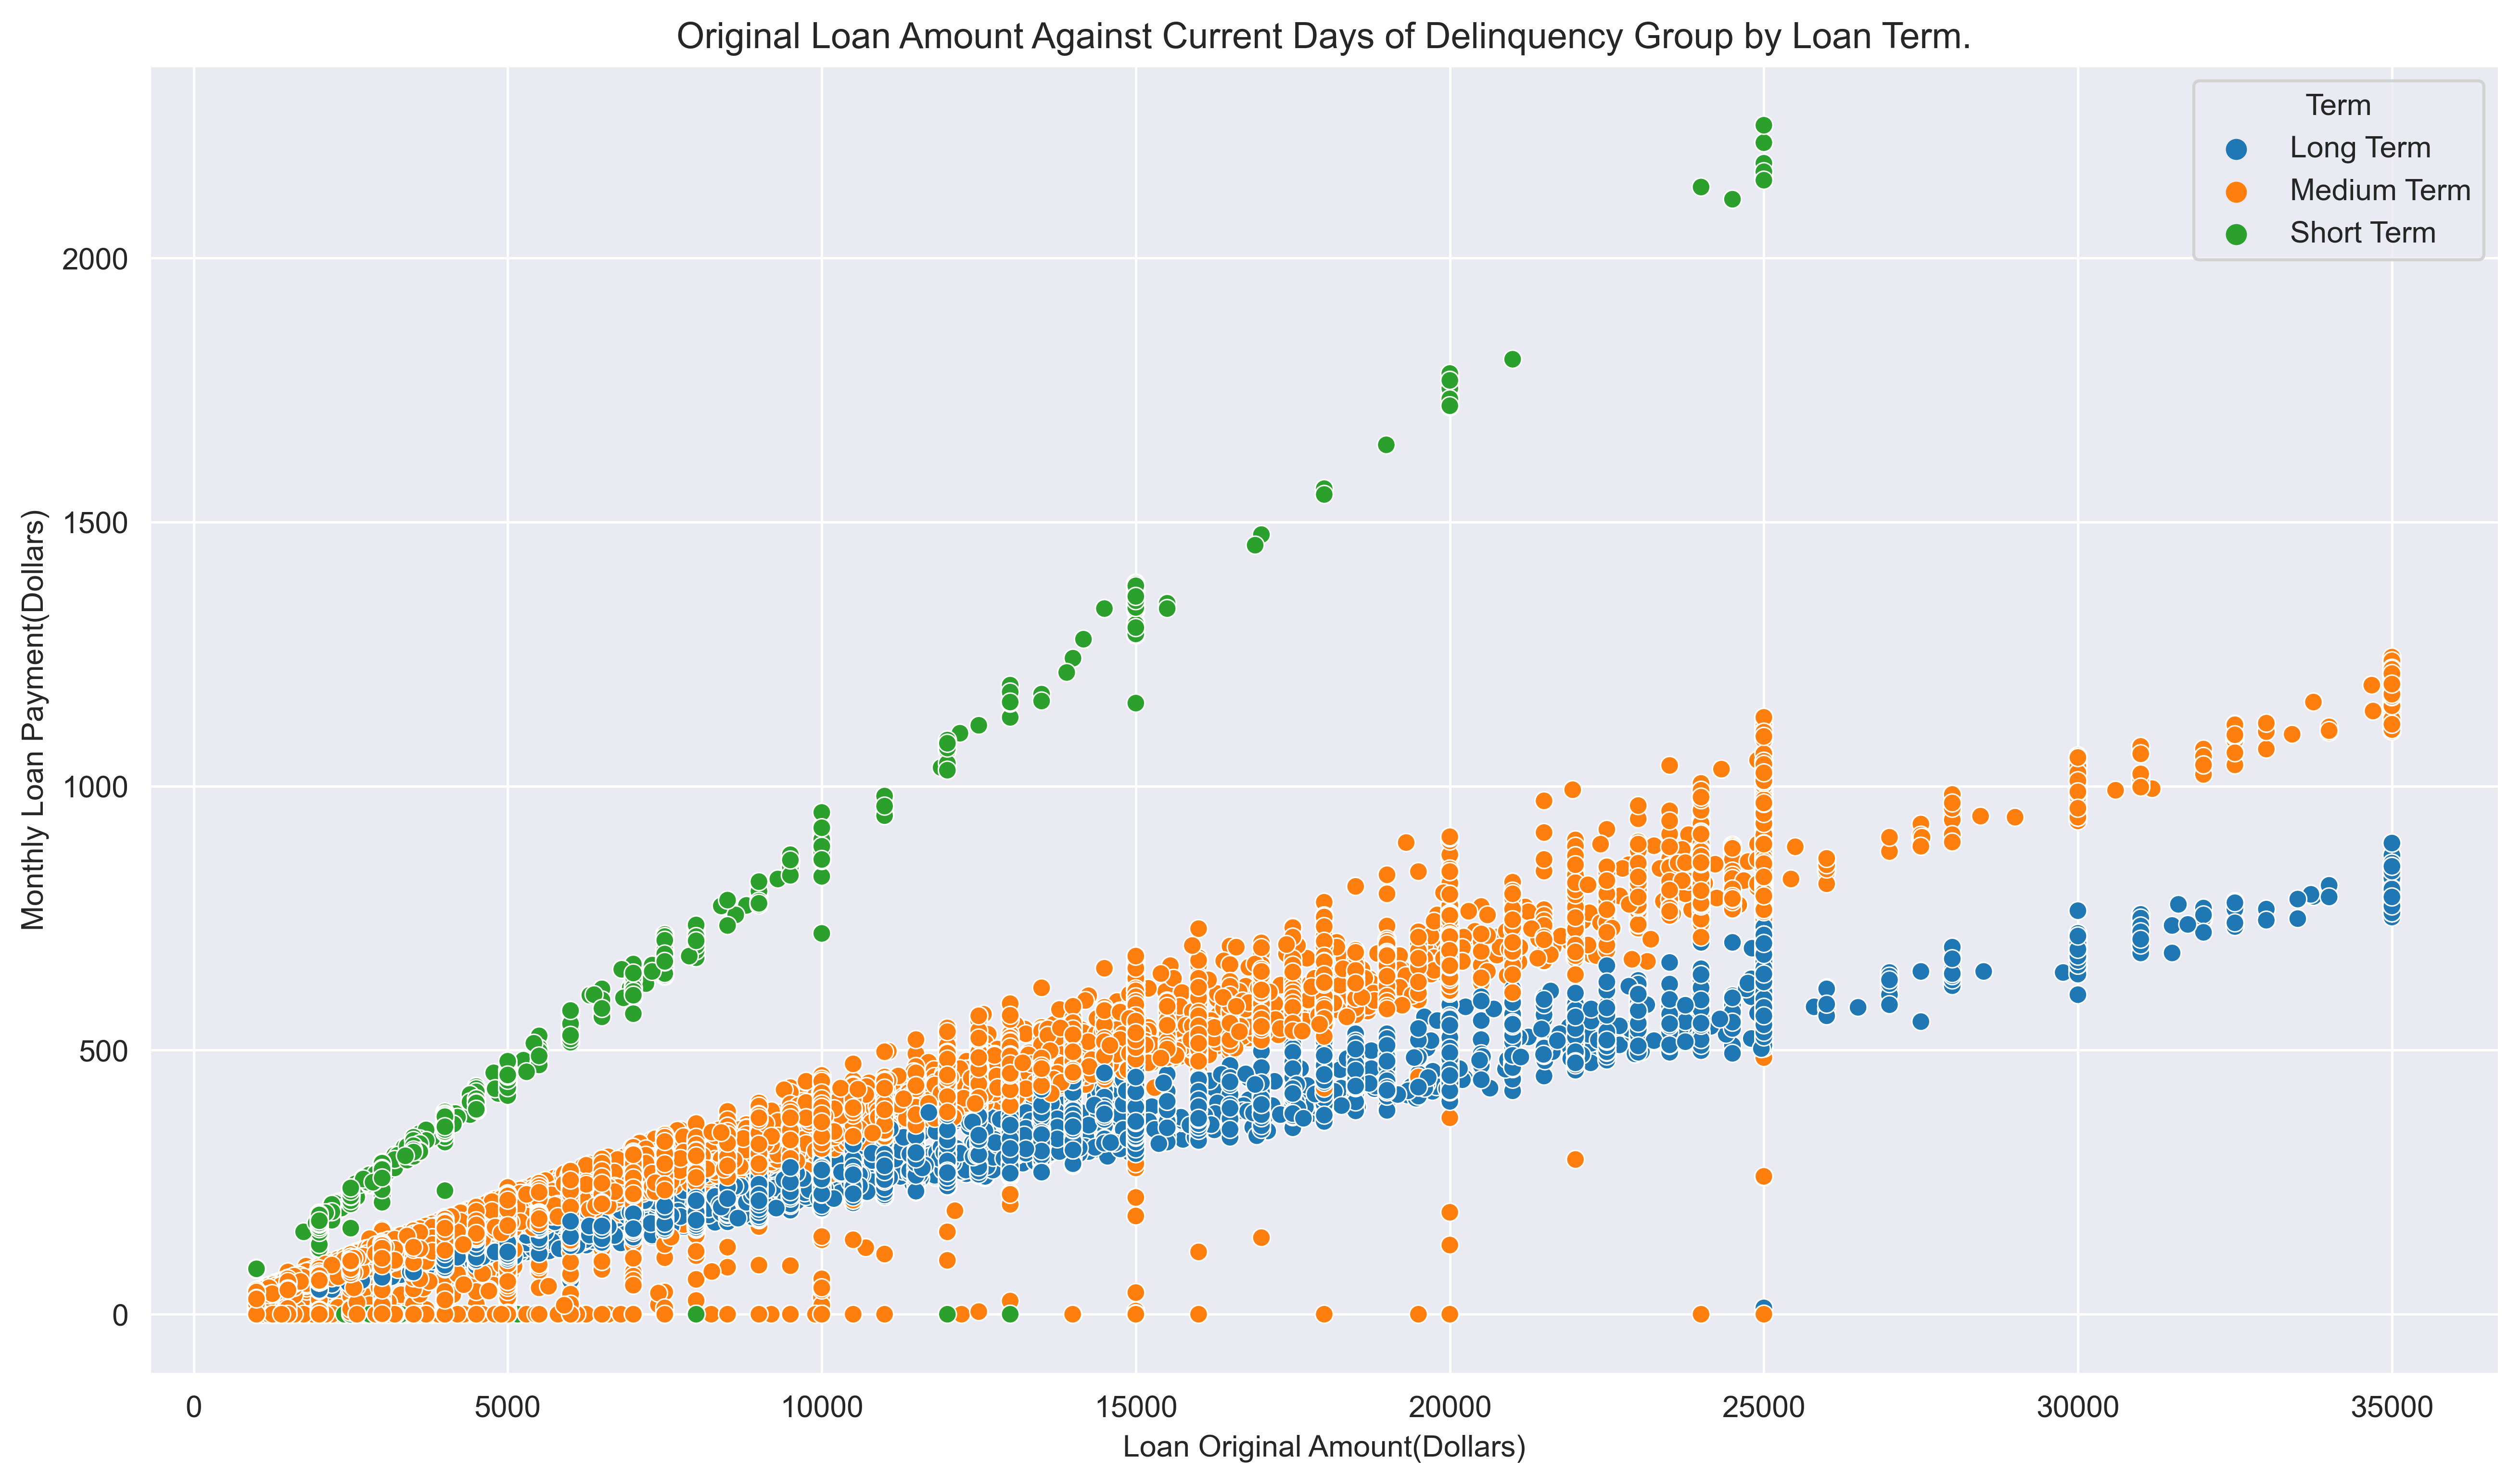

In [19]:
#Function to PLot Scatter plot on group by loan term
scatter('Term', 'Original Loan Amount Against Current Days of Delinquency Group by Loan Term.')

## Original Loan Amount Against Current Days of Delinquency Group Employment Status

> From earlier findings there exist a positive relationship between the loan original amount and monthly loan payment, the data point are spread across the plot categorized by year of loan.

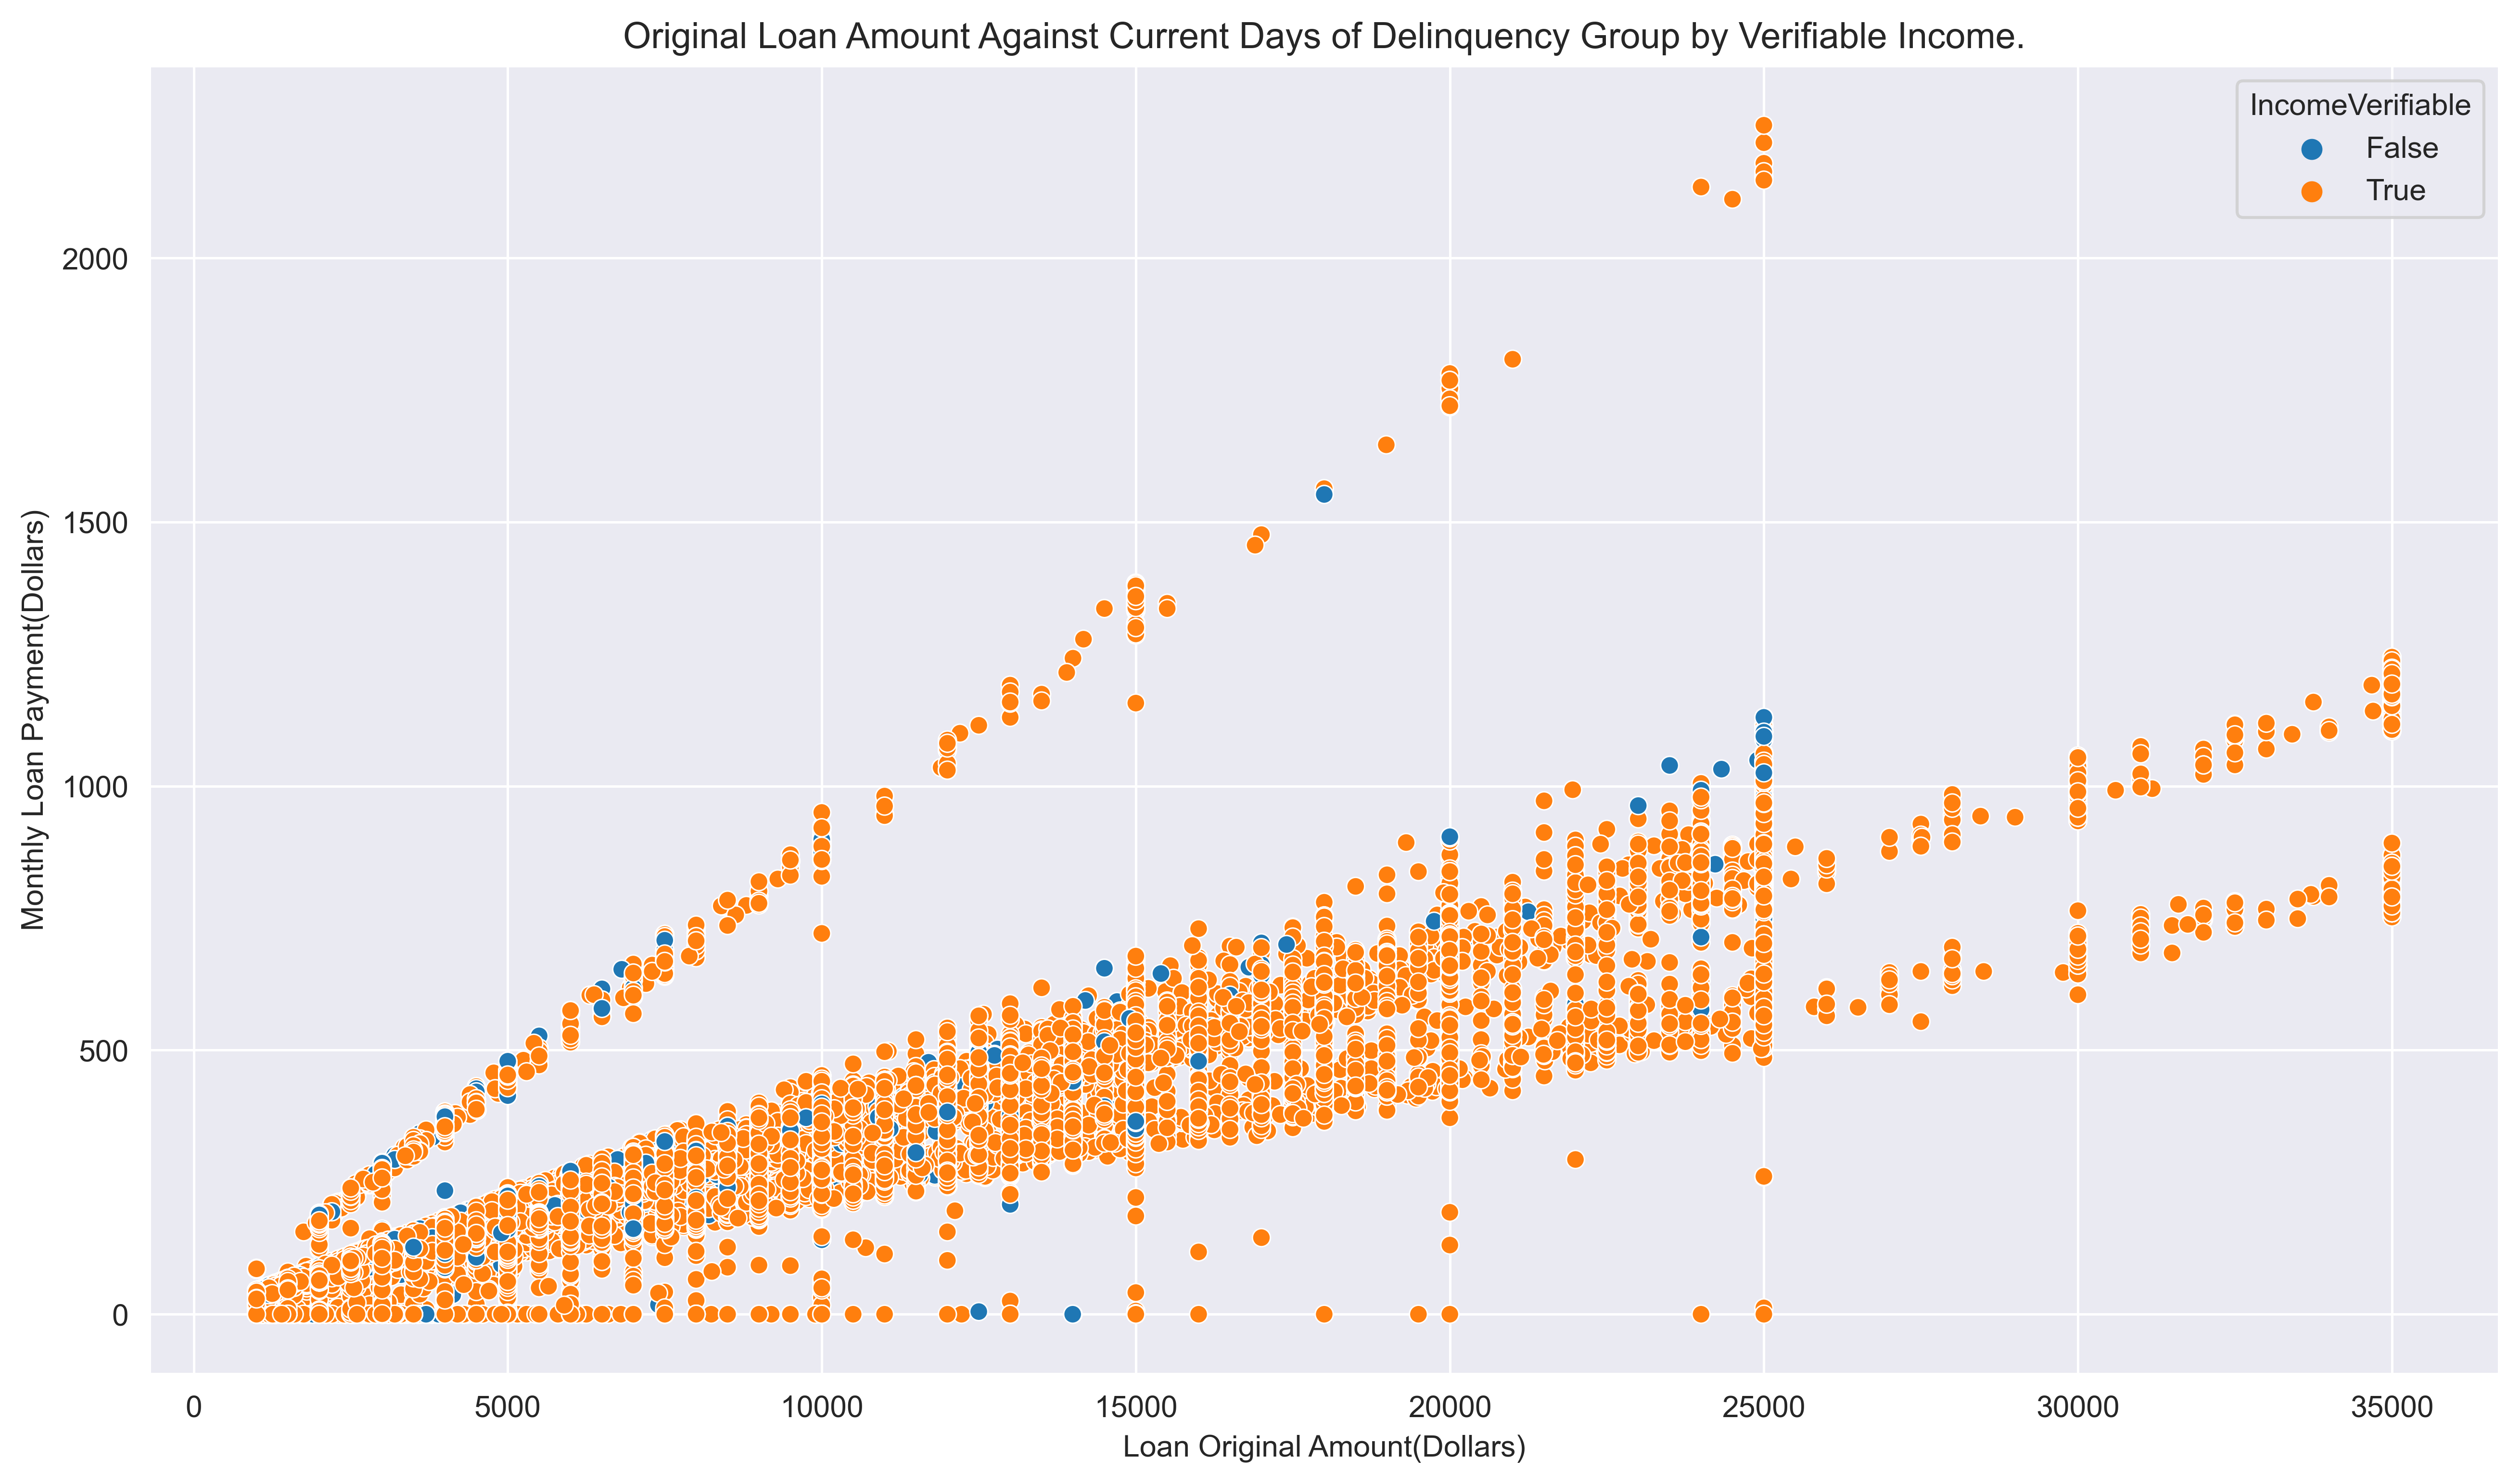

In [20]:
#Function to plot scatterplot on group by verifiable income
scatter('IncomeVerifiable', 'Original Loan Amount Against Current Days of Delinquency Group by Verifiable Income.')

## Correlation Matrix Depicting Relationship Between Variable with Heatmap

> Correlation between numerical variables based on their linear properties by plotting a heatmap. We can deduce from the heatmap that, we have a positive correlation between loan original amount and monthly loan payment with a correlation coefficient of 0.93, the stated monthly income and the monthly loan payment seems to have no correlation between them as well as the income verifiable and the Loans Current Days deliquent column.

Text(0.5, 1.0, 'Correlation Matrix Depicting Relationship Between Variable with Heatmap.')

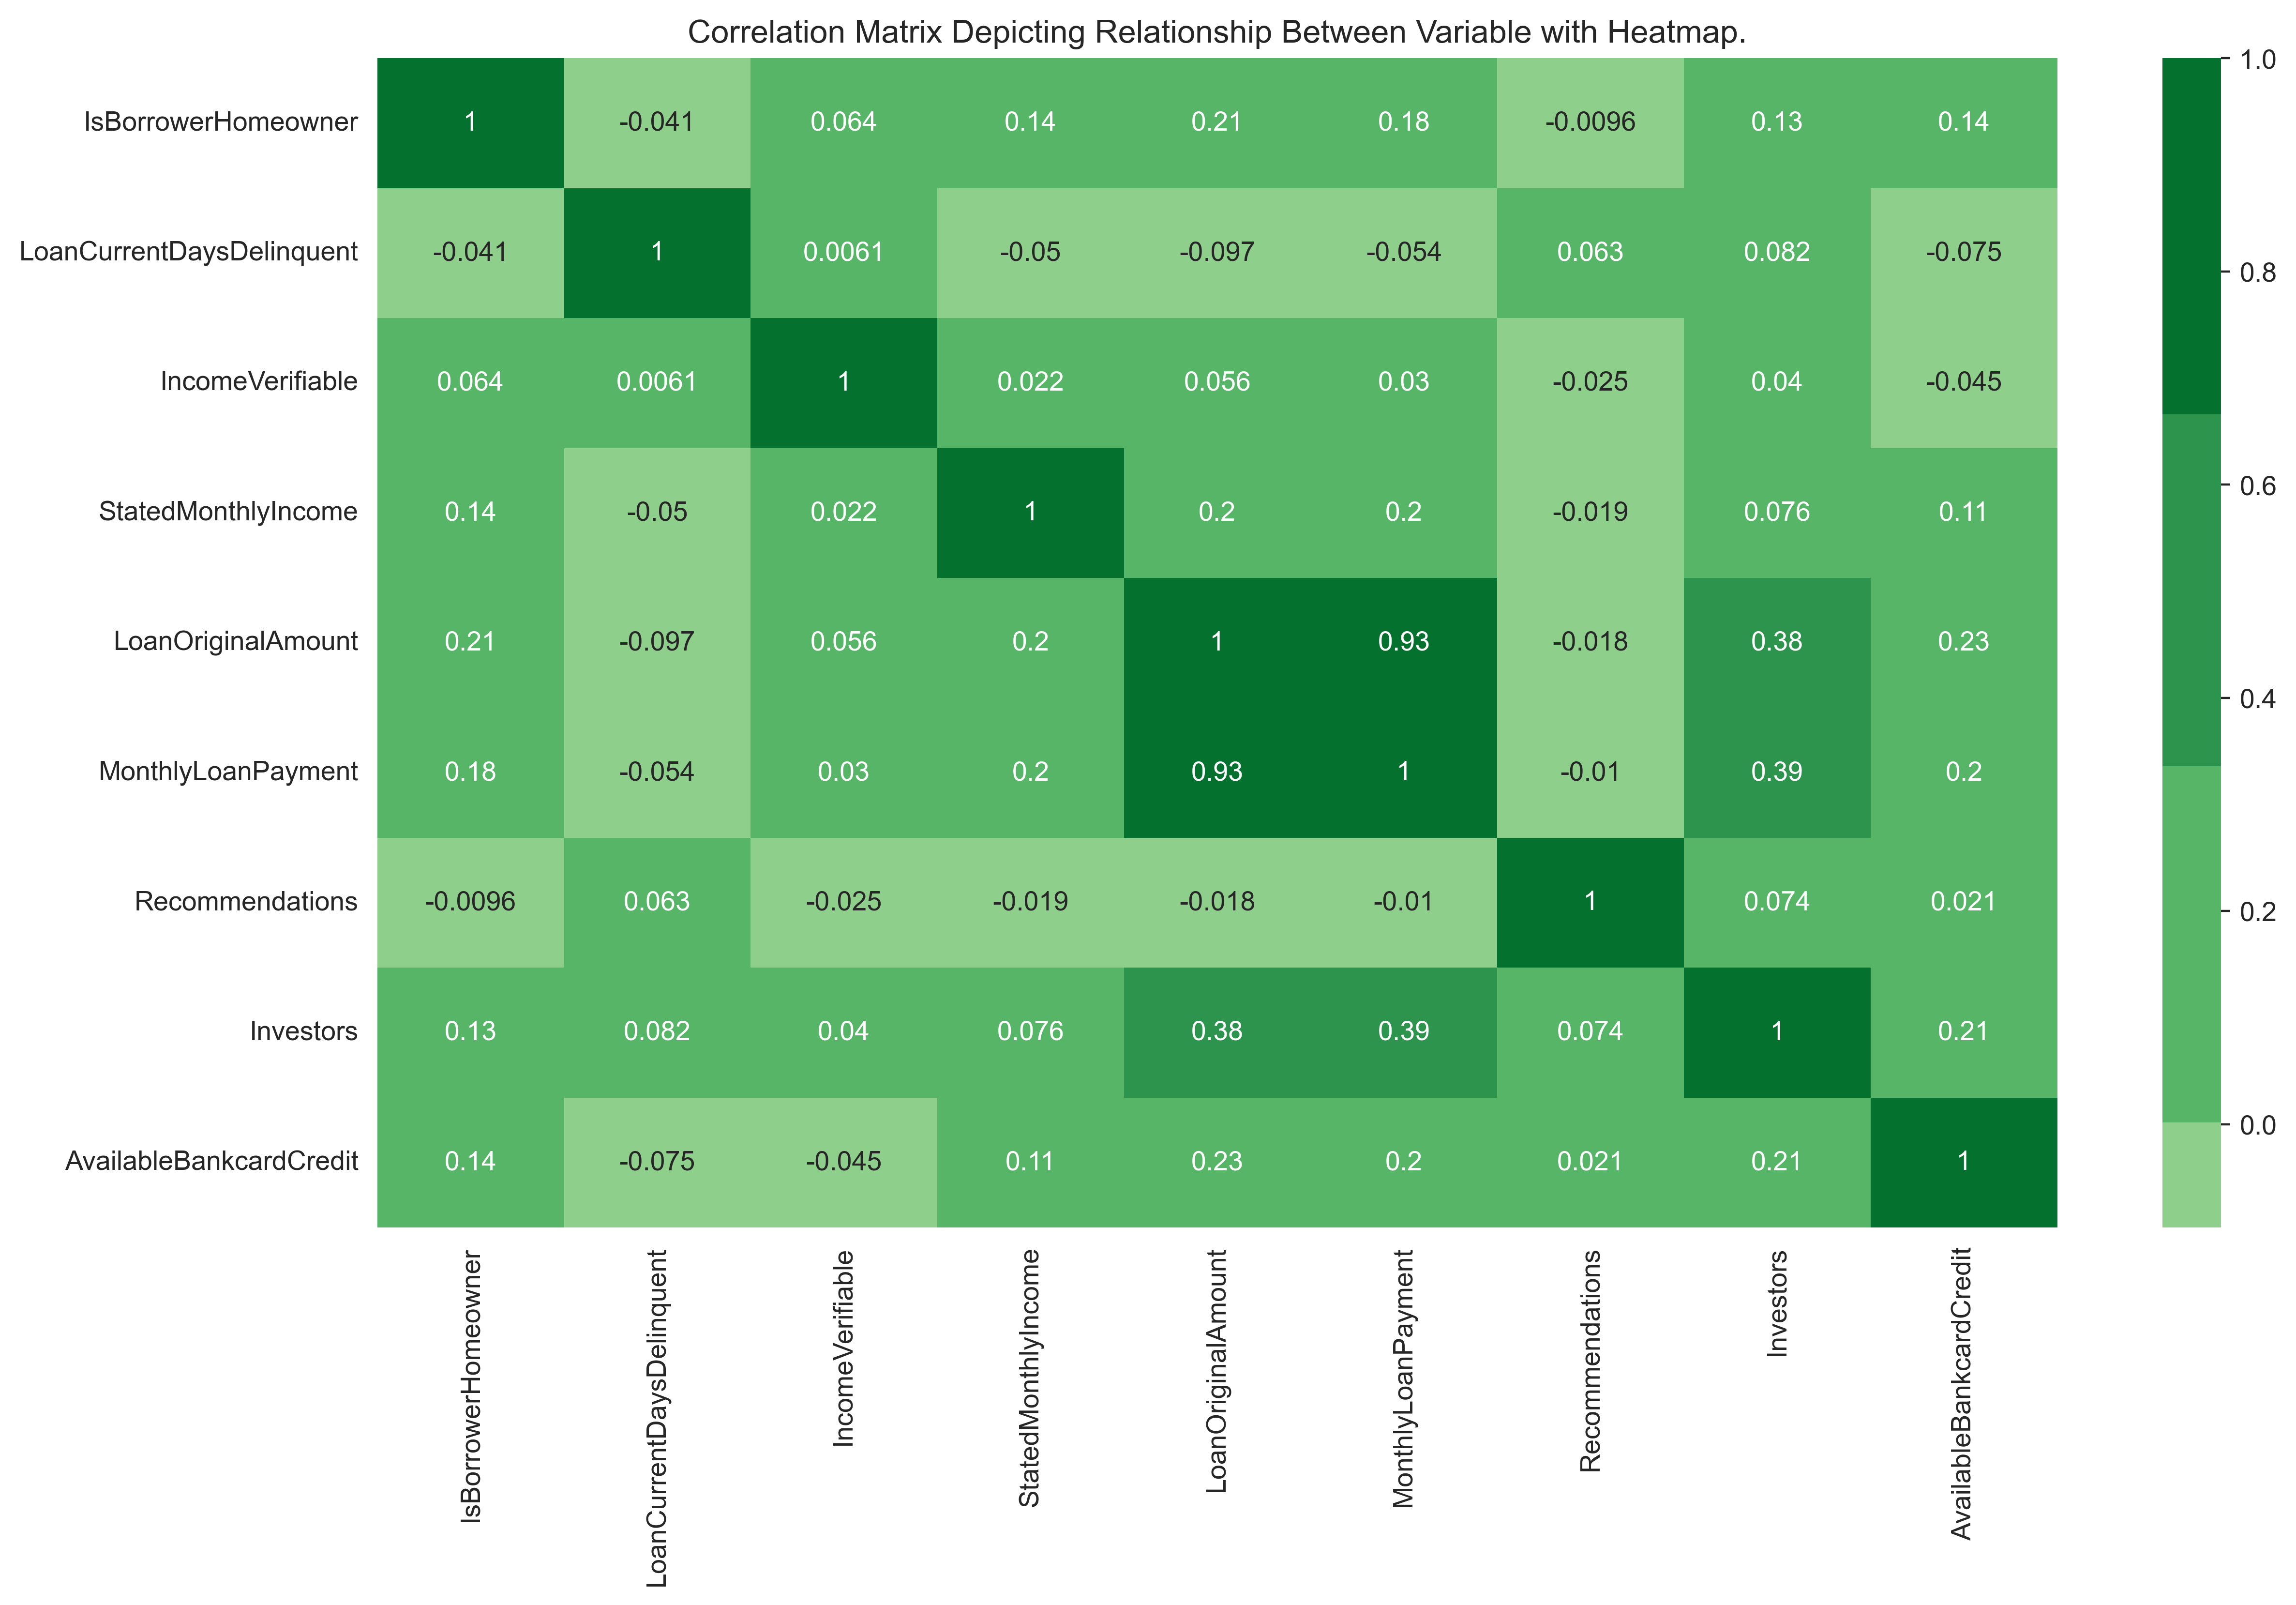

In [21]:
plt.figure(figsize=(14,8), dpi = 400)
colormap = sns.color_palette('Greens')
sns.heatmap(new_df.corr(), annot = True, cmap = colormap, center = 0)
plt.title('Correlation Matrix Depicting Relationship Between Variable with Heatmap.')


In [22]:
# creatina a slide show
!jupyter nbconvert Part_II_slide_deck_temp.ipynb --to slides --post serve --no-input --no-prompt

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'Part_II_slide_deck_template.ipynb' matched no files
